<a href="https://colab.research.google.com/github/Spykabore15/Automate_Projet/blob/main/Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Charger le fichier Excel
file_path = "GHGHighlights (1).xlsx"
xls = pd.ExcelFile(file_path)

# Lister les noms des feuilles
print(xls.sheet_names)

['CONTENTS', 'GHG Energy', 'GHG Fugi', 'GHG FC', 'GHG FC - Coal', 'GHG FC - Oil', 'GHG FC - Gas', 'CO2 MARBUNK', 'CO2 AVBUNK', 'SECTOR', 'SECTOREH', 'CO2-TES', 'CO2-GDP', 'CO2-GDP PPP', 'CO2-POP', 'SECTPOP', 'KAYA', 'TIMEEXTENDED', 'GEO COVERAGE']


In [2]:
import pandas as pd

# Charger le fichier Excel, feuille "GHG ENERGY", sans en-tête
file_path = "GHGHighlights (1).xlsx"
df_ghg_energy = pd.read_excel(file_path, sheet_name="GHG Energy", header=None)

# Identifier les lignes contenant les années (elles suivent "million tonnes of CO2 eq")
year_rows = df_ghg_energy[df_ghg_energy.iloc[:, 0].str.contains("million tonnes of CO2 eq", na=False, case=False)]

# Concaténer toutes les années (en ignorant la première colonne "million tonnes of CO2 eq")
years = []
for _, row in year_rows.iterrows():
    years.extend(row[1:].dropna().astype(str).values)

# Charger les données en ignorant les lignes de texte et d'en-têtes
data_start_index = 2  # Après "million tonnes of CO2 eq" et les années
df_ghg_energy = pd.read_excel(file_path, sheet_name="GHG Energy", header=None, skiprows=data_start_index)

# Filtrer les lignes qui ne sont pas des données (ex. "Back to the table of contents", lignes vides)
df_ghg_energy = df_ghg_energy[~df_ghg_energy.iloc[:, 0].str.contains("Back to the table of contents", na=False, case=False)]
df_ghg_energy = df_ghg_energy.dropna(subset=[0])  # Supprimer les lignes où la première colonne est vide

# Renommer les colonnes avec les années
df_ghg_energy.columns = ["Region"] + years

# Définir la première colonne comme index et renommer l'index
df_ghg_energy.set_index("Region", inplace=True)
df_ghg_energy.index.name = "Region"  # Assurer que l'index est bien nommé "Region"

# Remplacer ".." par NaN
df_ghg_energy.replace("..", pd.NA, inplace=True)

# Convertir les colonnes en type numérique
df_ghg_energy = df_ghg_energy.astype(float, errors="ignore")

# Afficher pour vérifier
display(df_ghg_energy.tail(20))

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,,,,,,,,,
Jordan,1.368822,1.522229,1.744064,1.854308,2.180547,2.676488,2.834336,3.409559,3.51149,4.363355,...,24.28216,24.10168,23.620335,24.898769,23.456047,22.155901,19.866322,20.547262,21.935998,<NA>
Kuwait,76.835875,78.919976,70.102302,56.845381,47.083357,48.708426,45.898495,52.448473,59.779124,46.522078,...,115.908293,118.53415,122.786705,119.938342,122.466018,119.71315,113.734977,120.261727,125.233542,<NA>
Lebanon,4.743864,5.155494,6.572641,6.686473,5.89756,5.434931,4.788542,5.989768,6.486839,6.852292,...,22.934208,25.04568,25.903938,27.385582,25.786945,25.941303,21.274112,16.224994,9.771446,<NA>
Oman,16.074622,15.650012,15.460456,15.275733,15.753579,17.720982,17.60063,4.899105,5.249959,5.571617,...,82.066729,86.005078,86.678997,87.107856,90.792002,91.571085,87.13922,92.735276,98.187263,<NA>
Qatar,14.430467,15.418941,17.382104,16.811334,18.639121,17.610589,15.977477,17.628704,17.590688,14.596809,...,107.497059,110.308191,112.050132,113.922336,112.831806,115.021718,113.127345,115.001765,120.10708,<NA>
Saudi Arabia,90.741693,107.614468,127.428867,143.202944,146.94092,182.993086,194.673922,195.885766,238.095205,268.673205,...,579.288517,606.527964,606.256894,597.62965,576.186796,572.682021,561.029195,574.293074,611.30753,<NA>
Syrian Arab Republic,29.089911,31.602362,30.659486,36.707551,50.871865,54.386757,52.106544,53.5777,51.524736,52.533648,...,40.584912,36.412086,33.079129,39.399524,41.680869,42.886094,43.036855,43.285103,41.598755,<NA>
United Arab Emirates,47.11561,53.115137,61.550114,67.580018,73.81229,86.748157,87.737216,74.639726,74.625944,75.504423,...,219.23106,230.196599,238.098902,227.731116,211.060527,223.71065,219.858329,221.966749,222.287958,<NA>
Yemen,1.229223,1.48287,1.899379,1.879929,1.786412,2.221699,2.239866,2.484471,2.687901,3.539901,...,44.283029,17.556647,11.84803,13.24477,17.447137,18.004428,16.877681,16.339747,15.142201,<NA>


In [3]:
# Garder uniquement les lignes qui ont au moins une valeur non-NaN
df_ghg_energy = df_ghg_energy.dropna(how="all")

# Afficher pour vérifier
display(df_ghg_energy.tail(20))

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,,,,,,,,,
Venezuela,400.332207,369.06948,391.779802,344.852121,272.572415,268.272097,266.076508,262.982258,290.236998,281.345749,...,442.606959,417.806163,384.244672,342.460969,287.191729,225.515181,138.731135,142.595747,166.847315,<NA>
Non-OECD Americas,749.462817,734.36948,788.151521,752.348687,684.622035,704.905922,718.930553,732.382341,788.543066,772.727652,...,1498.083144,1467.488852,1394.334837,1345.904646,1273.684822,1212.312845,1044.239288,1151.668366,1178.905273,<NA>
Bahrain,9.412014,9.042711,9.480933,9.712972,8.949604,10.546456,12.067785,12.638533,13.251842,13.069395,...,34.078945,34.34332,34.184795,34.413115,34.609736,37.542607,37.128676,37.509387,39.018715,<NA>
Islamic Rep. of Iran,207.986287,226.6358,256.365972,270.475849,269.860715,307.592713,306.305148,294.719012,224.029884,156.805597,...,705.880223,705.298149,742.124351,775.24052,764.130711,786.299198,798.176448,866.98083,879.955536,<NA>
Iraq,44.860533,46.122397,53.665781,56.362534,63.938154,76.572763,69.70359,75.733003,96.963916,81.128994,...,181.955061,189.34331,211.017318,223.591623,233.376896,247.438045,228.476268,245.356546,270.90613,<NA>
Jordan,1.368822,1.522229,1.744064,1.854308,2.180547,2.676488,2.834336,3.409559,3.51149,4.363355,...,24.28216,24.10168,23.620335,24.898769,23.456047,22.155901,19.866322,20.547262,21.935998,<NA>
Kuwait,76.835875,78.919976,70.102302,56.845381,47.083357,48.708426,45.898495,52.448473,59.779124,46.522078,...,115.908293,118.53415,122.786705,119.938342,122.466018,119.71315,113.734977,120.261727,125.233542,<NA>
Lebanon,4.743864,5.155494,6.572641,6.686473,5.89756,5.434931,4.788542,5.989768,6.486839,6.852292,...,22.934208,25.04568,25.903938,27.385582,25.786945,25.941303,21.274112,16.224994,9.771446,<NA>
Oman,16.074622,15.650012,15.460456,15.275733,15.753579,17.720982,17.60063,4.899105,5.249959,5.571617,...,82.066729,86.005078,86.678997,87.107856,90.792002,91.571085,87.13922,92.735276,98.187263,<NA>


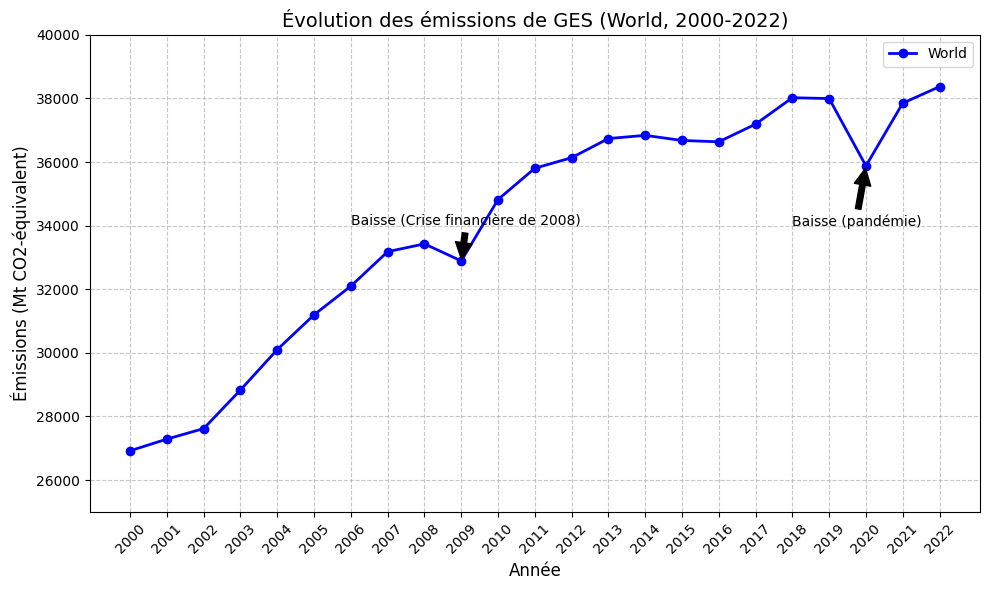

In [4]:
import matplotlib.pyplot as plt

# Sélectionner les années 2000 à 2023
years = [str(year) for year in range(2000, 2024)]

# Extraire les données pour "World"
world_emissions = df_ghg_energy.loc["World", years]

# Supprimer les NaN et ajuster les années correspondantes
world_emissions_clean = world_emissions.dropna()
years_clean = world_emissions_clean.index

# Créer le graphique
plt.figure(figsize=(10, 6))  # Ajuster la taille
plt.plot(years_clean, world_emissions_clean, label="World", marker="o", color="blue", linewidth=2)

# Ajuster l'échelle de l'axe y
plt.ylim(25000, 40000)  # Zoom sur la plage des données

# Ajouter une annotation pour 2020 (baisse due à la pandémie)
plt.annotate("Baisse (pandémie)", xy=("2020", world_emissions_clean["2020"]),
             xytext=("2018", 34000), arrowprops=dict(facecolor="black", shrink=0.05))
# Ajouter une annotation pour 2009 (baisse due à la crise financière de 2008)
plt.annotate("Baisse (Crise financière de 2008)", xy=("2009", world_emissions_clean["2009"]),
             xytext=("2006", 34000), arrowprops=dict(facecolor="black", shrink=0.05))

# Étiquettes et titre
plt.xlabel("Année", fontsize=12)
plt.ylabel("Émissions (Mt CO2-équivalent)", fontsize=12)
plt.title("Évolution des émissions de GES (World, 2000-2022)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)  # Grille plus fine
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

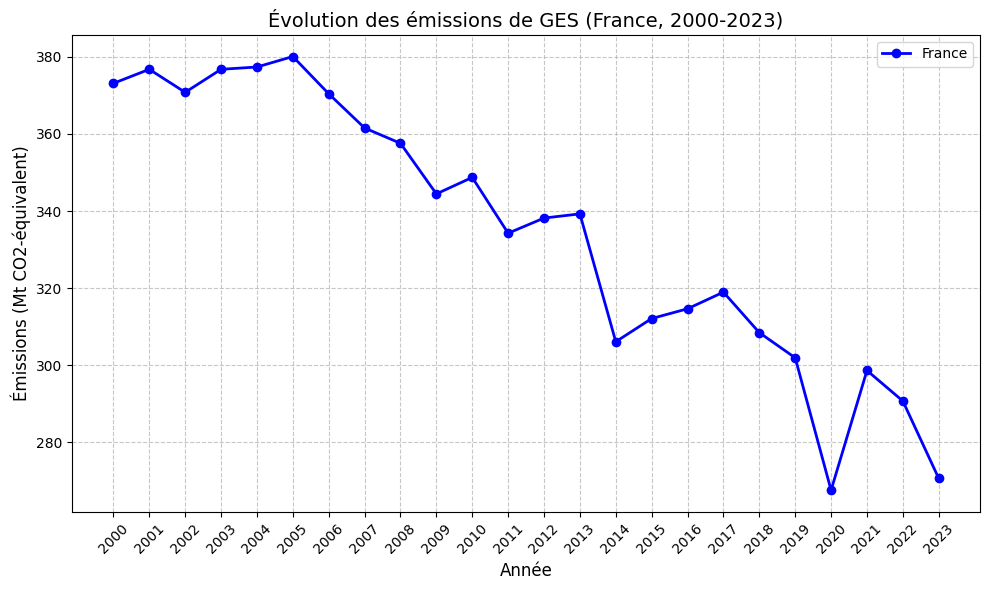

In [5]:
import matplotlib.pyplot as plt

# Sélectionner les années 2000 à 2023
years = [str(year) for year in range(2000, 2024)]

# Extraire les données pour "World"
france_emissions = df_ghg_energy.loc["France", years]

# Supprimer les NaN et ajuster les années correspondantes
france_emissions_clean = france_emissions.dropna()
years_clean = france_emissions_clean.index

# Créer le graphique
plt.figure(figsize=(10, 6))  # Ajuster la taille
plt.plot(years_clean, france_emissions_clean, label="France", marker="o", color="blue", linewidth=2)

# Étiquettes et titre
plt.xlabel("Année", fontsize=12)
plt.ylabel("Émissions (Mt CO2-équivalent)", fontsize=12)
plt.title("Évolution des émissions de GES (France, 2000-2023)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)  # Grille plus fine
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

Charbon 2022 (World) : 15273.95144
Pétrole 2022 (World) : 11435.60931
Gaz 2022 (World) : 7457.77957


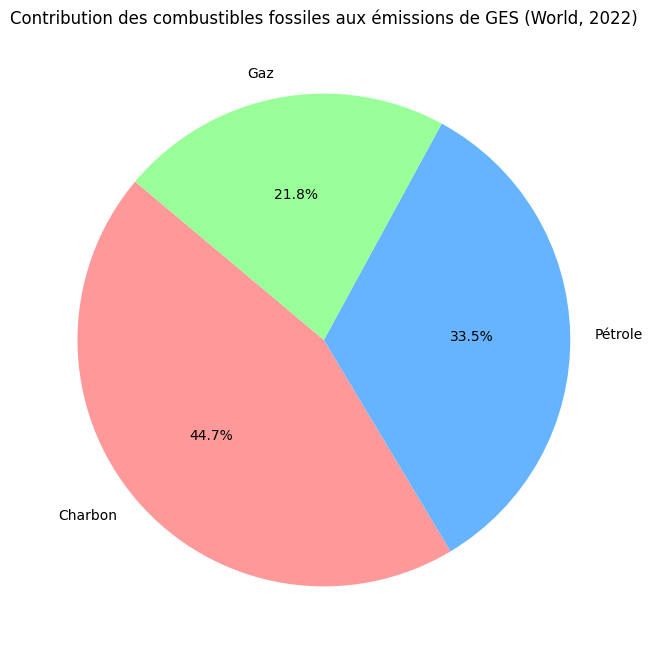

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Importer les feuilles pour les émissions par combustible
df_coal = pd.read_excel(file_path, sheet_name="GHG FC - Coal", header=None, skiprows=2)
df_oil = pd.read_excel(file_path, sheet_name="GHG FC - Oil", header=None, skiprows=2)
df_gas = pd.read_excel(file_path, sheet_name="GHG FC - Gas", header=None, skiprows=2)

# Liste des années (1971 à 2023)
years = [str(year) for year in range(1971, 2024)]

# Renommer les colonnes et nettoyer
for df in [df_coal, df_oil, df_gas]:
    df.columns = ["Region"] + years
    df.set_index("Region", inplace=True)
    df.index.name = "Region"
    df.replace("..", pd.NA, inplace=True)
    df = df.astype(float, errors="ignore")

# Extraire les émissions de "World" pour 2022
coal_2022 = df_coal.loc["World", "2022"]
oil_2022 = df_oil.loc["World", "2022"]
gas_2022 = df_gas.loc["World", "2022"]

# Vérifier les données
print("Charbon 2022 (World) :", coal_2022)
print("Pétrole 2022 (World) :", oil_2022)
print("Gaz 2022 (World) :", gas_2022)

# Créer un diagramme circulaire
labels = ["Charbon", "Pétrole", "Gaz"]
values = [coal_2022, oil_2022, gas_2022]
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.title("Contribution des combustibles fossiles aux émissions de GES (World, 2022)")
plt.show()

In [8]:
import matplotlib.pyplot as plt

def plot_emissions_evolution(df, region, start_year=2000, end_year=2023,
                            y_min=None, y_max=None, annotation_year=None,
                            annotation_text="Baisse (pandémie)", annotation_xytext=None,
                            color="blue", title_prefix="Évolution des émissions de GES"):
    """
    Trace l'évolution des émissions de GES pour une région donnée sur une période donnée.

    Paramètres :
    - df : DataFrame contenant les données (ex. df_ghg_energy)
    - region : Nom de la région ou du pays (ex. "World", "France", "OECD Americas")
    - start_year : Année de début (par défaut 2000)
    - end_year : Année de fin (par défaut 2023)
    - y_min : Valeur minimale de l'axe y (par défaut None, ajusté automatiquement)
    - y_max : Valeur maximale de l'axe y (par défaut None, ajusté automatiquement)
    - annotation_year : Année pour l'annotation (ex. "2020" pour la baisse pandémique)
    - annotation_text : Texte de l'annotation (par défaut "Baisse (pandémie)")
    - annotation_xytext : Position du texte de l'annotation (ex. ("2018", 34000))
    - color : Couleur de la ligne (par défaut "blue")
    - title_prefix : Préfixe du titre (par défaut "Évolution des émissions de GES")
    """
    # Vérifier si la région existe dans le DataFrame
    if region not in df.index:
        print(f"Erreur : La région '{region}' n'est pas dans le DataFrame. Régions disponibles : {list(df.index)}")
        return

    # Sélectionner les années
    years = [str(year) for year in range(start_year, end_year + 1)]

    # Extraire les données pour la région
    emissions = df.loc[region, years]

    # Supprimer les NaN et ajuster les années correspondantes
    emissions_clean = emissions.dropna()
    years_clean = emissions_clean.index

    # Vérifier s'il y a des données après suppression des NaN
    if len(emissions_clean) == 0:
        print(f"Erreur : Aucune donnée disponible pour '{region}' sur la période {start_year}-{end_year}.")
        return

    # Créer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(years_clean, emissions_clean, label=region, marker="o", color=color, linewidth=2)

    # Ajuster l'échelle de l'axe y si spécifiée
    if y_min is not None and y_max is None:
        plt.ylim(y_min, emissions_clean.max() * 1.1)
    elif y_min is None and y_max is not None:
        plt.ylim(emissions_clean.min() * 0.9, y_max)
    elif y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    else:
        plt.ylim(emissions_clean.min() * 0.9, emissions_clean.max() * 1.1)  # Ajustement automatique

    # Ajouter une annotation si spécifiée
    if annotation_year and annotation_year in years_clean:
        if annotation_xytext is None:
            # Positionner l'annotation au-dessus de la courbe
            annotation_xytext = (years_clean[int(len(years_clean)/2)], emissions_clean.max() * 1.05)
        plt.annotate(annotation_text, xy=(annotation_year, emissions_clean[annotation_year]),
                     xytext=annotation_xytext, arrowprops=dict(facecolor="black", shrink=0.05))

    # Étiquettes et titre
    plt.xlabel("Année", fontsize=12)
    plt.ylabel("Émissions (Mt CO2-équivalent)", fontsize=12)
    plt.title(f"{title_prefix} ({region}, {start_year}-{years_clean[-1]})", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

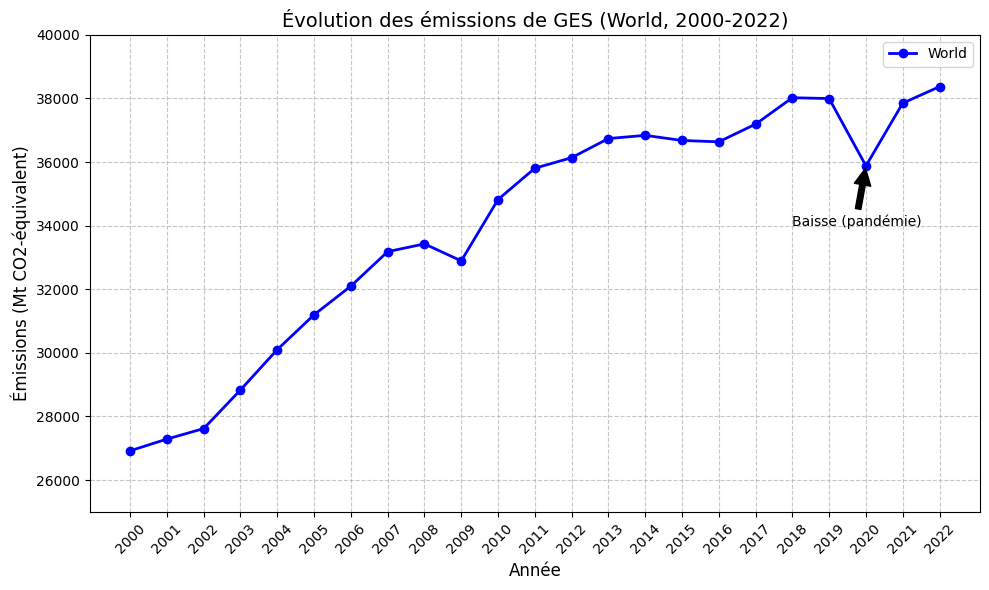

In [ ]:
# Tester sur "World"
plot_emissions_evolution(df_ghg_energy, region="World", start_year=2000, end_year=2023,
                         y_min=25000, y_max=40000, annotation_year="2020",
                         annotation_xytext=("2018", 34000), color="blue")

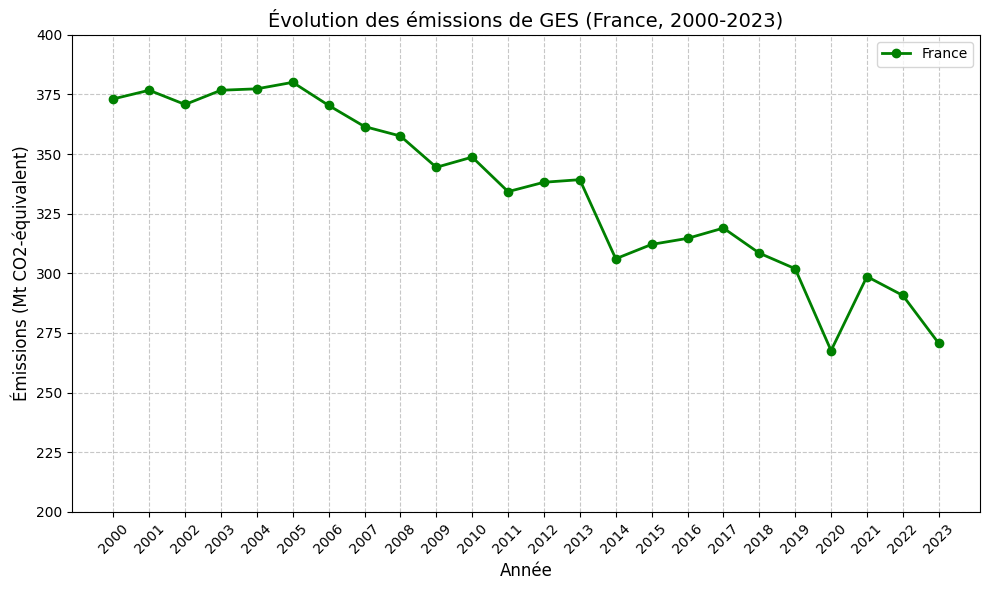

In [ ]:
# Tester sur "France"
plot_emissions_evolution(df_ghg_energy, region="France", start_year=2000, end_year=2023,
                         y_min=200, y_max=400,
                         annotation_xytext=("2018", 350), color="green")

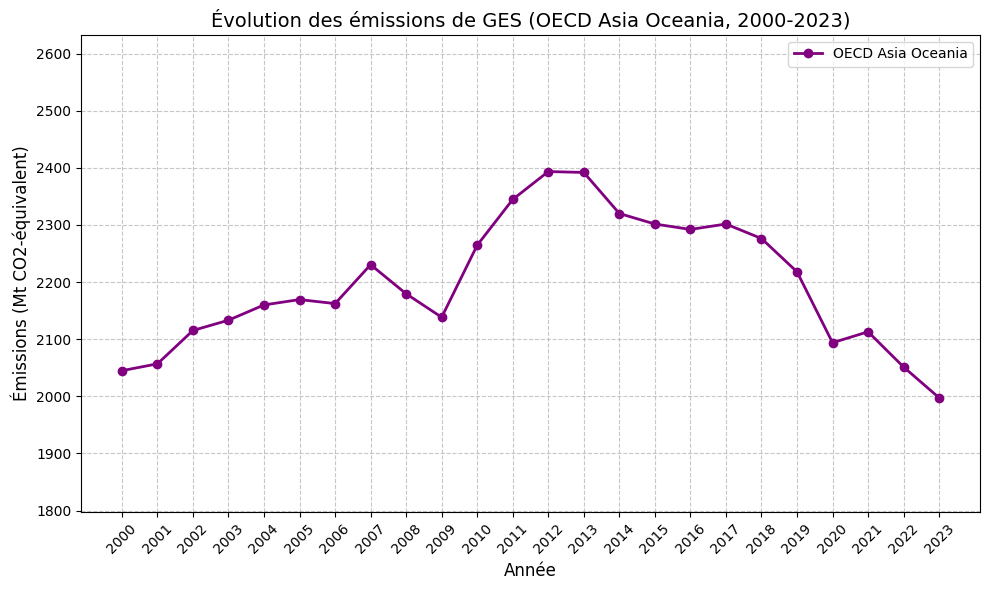

In [ ]:
# Tester sur "OECD Asia Oceania"
plot_emissions_evolution(df_ghg_energy, region="OECD Asia Oceania", start_year=2000, end_year=2023,
                          annotation_xytext=("2018", 1000), color="purple")

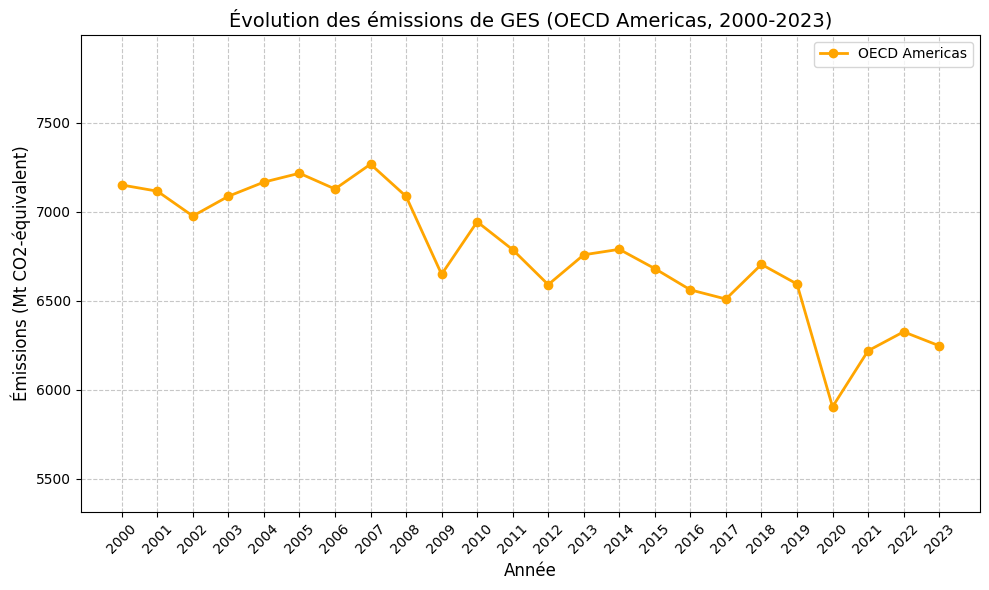

In [14]:
# Tester sur "OECD Americas"
plot_emissions_evolution(df_ghg_energy, region='OECD Americas', start_year=2000, end_year=2023,
                         color="orange")

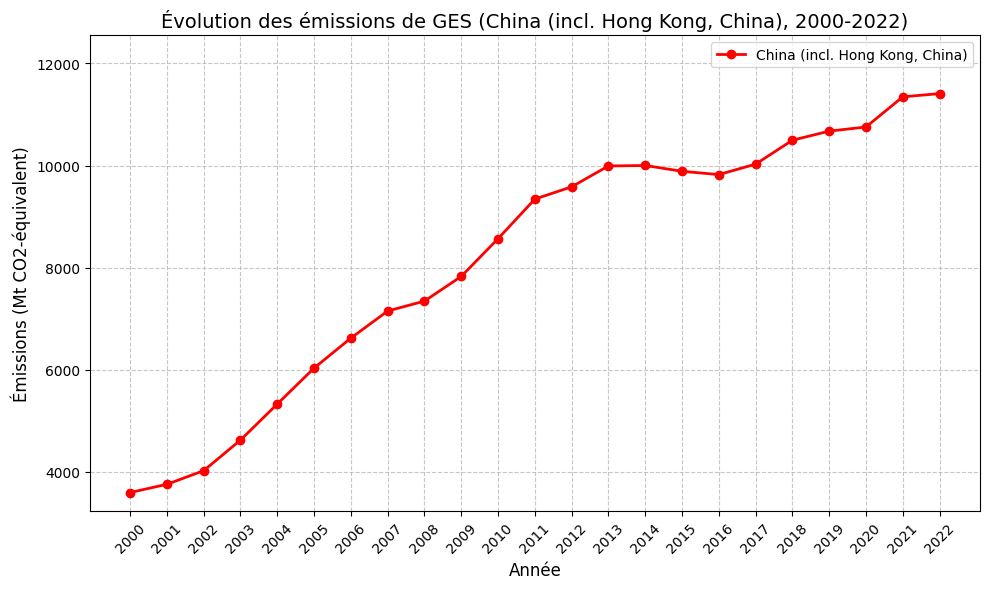

In [9]:
# Tester sur "China (incl. Hong Kong, China)"
plot_emissions_evolution(df_ghg_energy, region="China (incl. Hong Kong, China)", start_year=2000, end_year=2023,

                         annotation_xytext=("2018", 5000), color="red")

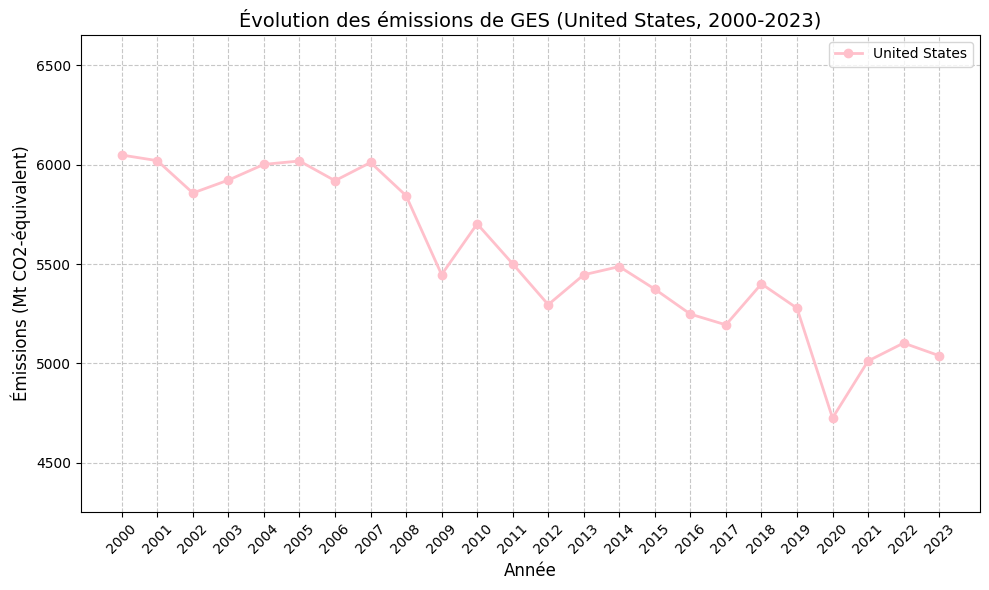

In [19]:
# Tester sur "United States"
plot_emissions_evolution(df_ghg_energy, region='United States', start_year=2000, end_year=2023,
                         color="pink")

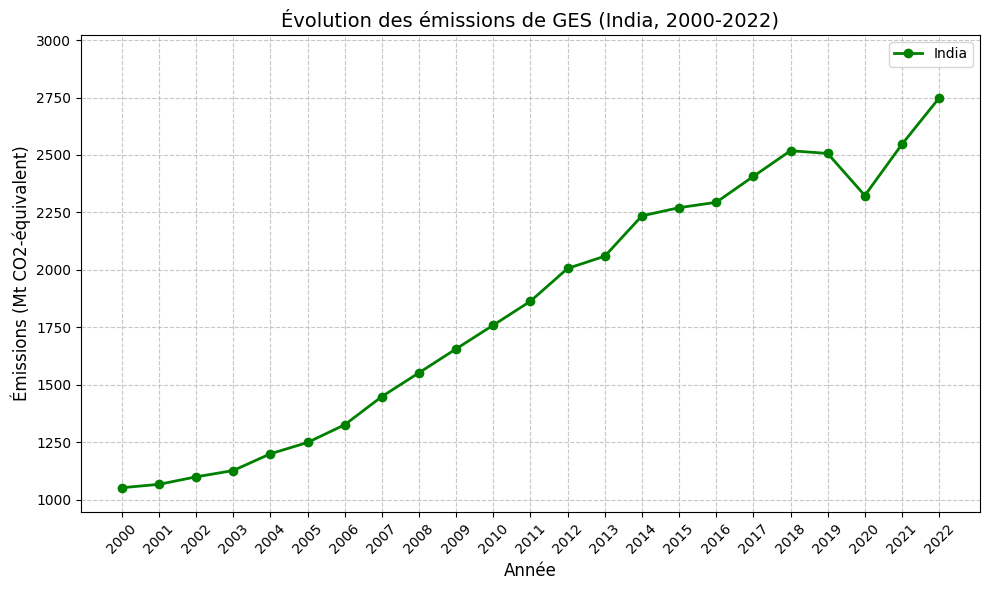

In [11]:
# Tester sur "India"
plot_emissions_evolution(df_ghg_energy, region='India', start_year=2000, end_year=2023,
                         color="green")

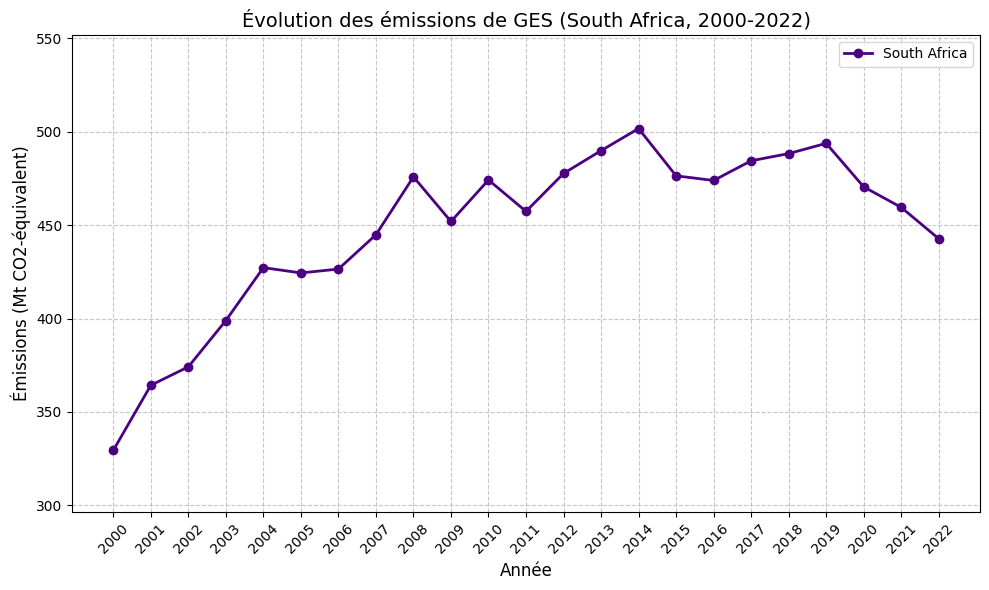

In [42]:
# Tester sur "South Africa"
plot_emissions_evolution(df_ghg_energy, region='South Africa', start_year=2000, end_year=2023,
                         color="indigo")

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_fuel_contribution_pie(file_path, region="World", year=2022,
                              colors=["#ff9999", "#66b3ff", "#99ff99"],
                              title_prefix="Contribution des combustibles fossiles aux émissions de GES"):
    """
    Génère un diagramme circulaire montrant la contribution des combustibles fossiles (charbon, pétrole, gaz)
    aux émissions de GES pour une région donnée à une année spécifique.

    Paramètres :
    - file_path : Chemin vers le fichier Excel (ex. "GHGHighlights (1).xlsx")
    - region : Région ou pays à analyser (par défaut "World")
    - year : Année à analyser (par défaut 2022)
    - colors : Liste de couleurs pour charbon, pétrole, gaz (par défaut ["#ff9999", "#66b3ff", "#99ff99"])
    - title_prefix : Préfixe du titre (par défaut "Contribution des combustibles fossiles aux émissions de GES")
    """
    # Importer les feuilles pour les émissions par combustible
    df_coal = pd.read_excel(file_path, sheet_name="GHG FC - Coal", header=None, skiprows=2)
    df_oil = pd.read_excel(file_path, sheet_name="GHG FC - Oil", header=None, skiprows=2)
    df_gas = pd.read_excel(file_path, sheet_name="GHG FC - Gas", header=None, skiprows=2)

    # Liste des années (1971 à 2023)
    years = [str(year) for year in range(1971, 2024)]

    # Renommer les colonnes et nettoyer
    for df in [df_coal, df_oil, df_gas]:
        df.columns = ["Region"] + years
        df.set_index("Region", inplace=True)
        df.index.name = "Region"
        df.replace("..", pd.NA, inplace=True)
        df = df.astype(float, errors="ignore")

    # Vérifier si la région existe dans les DataFrames
    if region not in df_coal.index or region not in df_oil.index or region not in df_gas.index:
        print(f"Erreur : La région '{region}' n'est pas dans les données. Régions disponibles : {list(df_coal.index)}")
        return

    # Extraire les émissions pour l'année spécifiée
    coal_value = df_coal.loc[region, str(year)]
    oil_value = df_oil.loc[region, str(year)]
    gas_value = df_gas.loc[region, str(year)]

    # Vérifier si les données sont disponibles (pas de NaN)
    if pd.isna(coal_value) or pd.isna(oil_value) or pd.isna(gas_value):
        print(f"Erreur : Données manquantes pour '{region}' en {year}.")
        return

    # Vérifier les données
    print(f"Charbon {year} ({region}) :", coal_value)
    print(f"Pétrole {year} ({region}) :", oil_value)
    print(f"Gaz {year} ({region}) :", gas_value)

    # Créer un diagramme circulaire
    labels = ["Charbon", "Pétrole", "Gaz"]
    values = [coal_value, oil_value, gas_value]

    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"{title_prefix} ({region}, {year})", fontsize=14)
    plt.show()

Charbon 1971 (World) : 5313.544878
Pétrole 1971 (World) : 6758.735187
Gaz 1971 (World) : 2048.580633


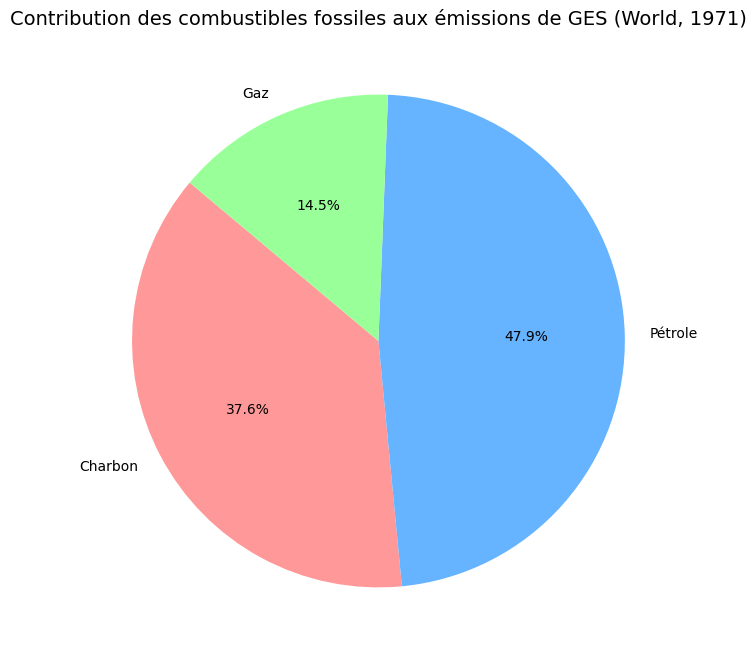

Charbon 1971 (France) : 142.9905262
Pétrole 1971 (France) : 268.1601076
Gaz 1971 (France) : 17.75809646


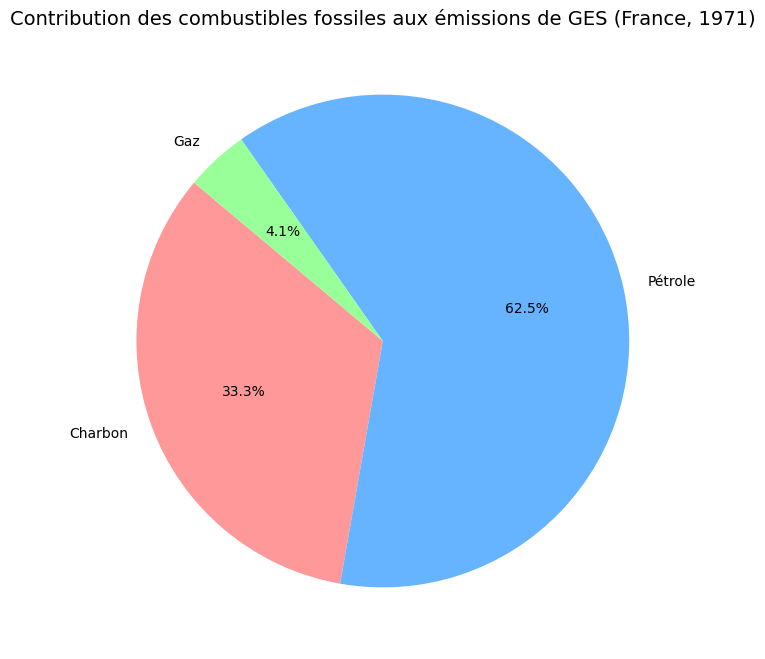

Charbon 1971 (OECD Americas) : 1193.52863
Pétrole 1971 (OECD Americas) : 2338.874771
Gaz 1971 (OECD Americas) : 1289.743655


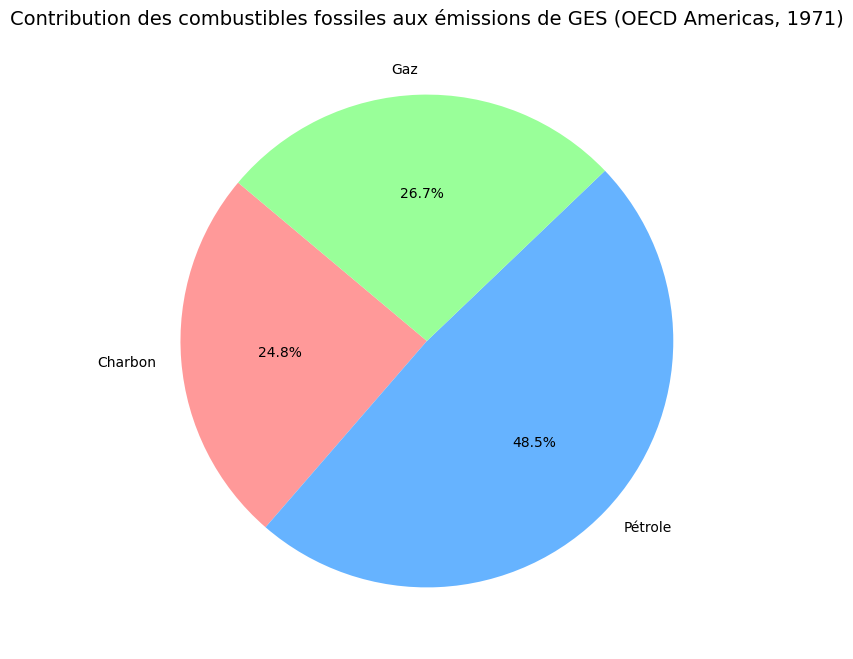

Charbon 1971 (China (incl. Hong Kong, China)) : 678.7446729
Pétrole 1971 (China (incl. Hong Kong, China)) : 123.4820209
Gaz 1971 (China (incl. Hong Kong, China)) : 7.420985791


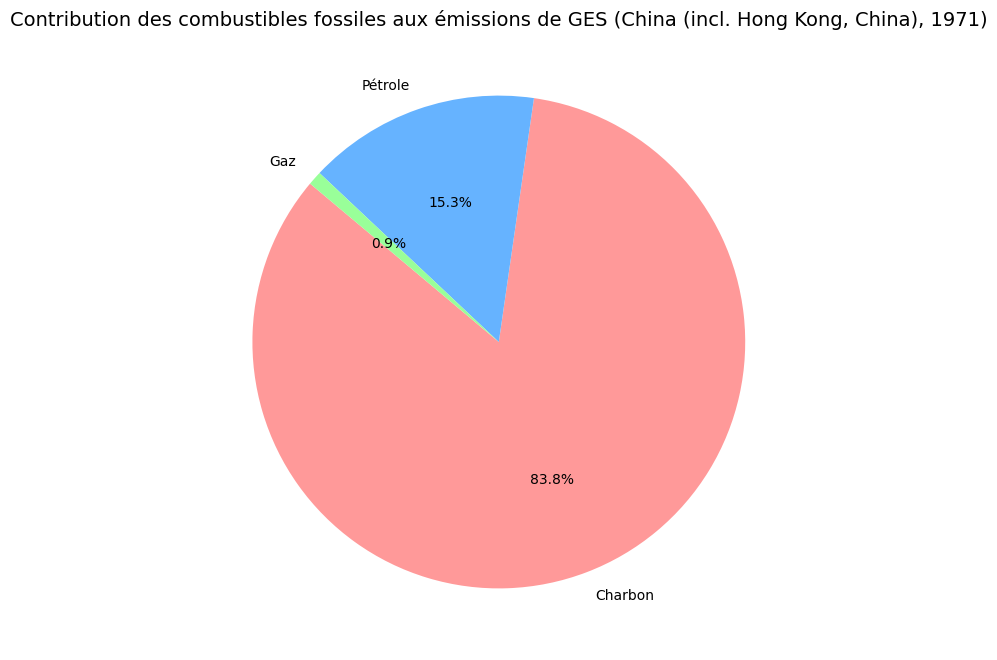

Charbon 1971 (South Africa) : 130.733802
Pétrole 1971 (South Africa) : 28.2977847
Gaz 1971 (South Africa) : 0


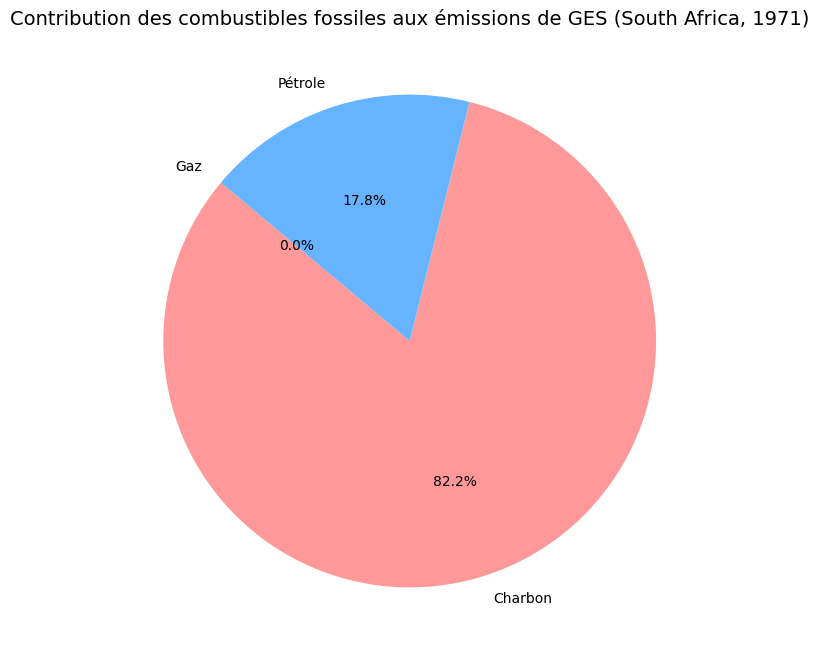

In [43]:
# Tester pour "World" en 1971
plot_fuel_contribution_pie(file_path, region="World", year=1971)

# Tester pour "France" en 1971
plot_fuel_contribution_pie(file_path, region="France", year=1971)

# Tester pour "OECD Americas" en 1971
plot_fuel_contribution_pie(file_path, region="OECD Americas", year=1971)

# Tester pour "China (incl. Hong Kong, China)" en 1971
plot_fuel_contribution_pie(file_path, region="China (incl. Hong Kong, China)", year=1971)

# Tester pour "South Africa" en 1971
plot_fuel_contribution_pie(file_path, region="South Africa", year=1971)



Charbon 2000 (World) : 8969.617527
Pétrole 2000 (World) : 9810.996364
Gaz 2000 (World) : 4571.617166


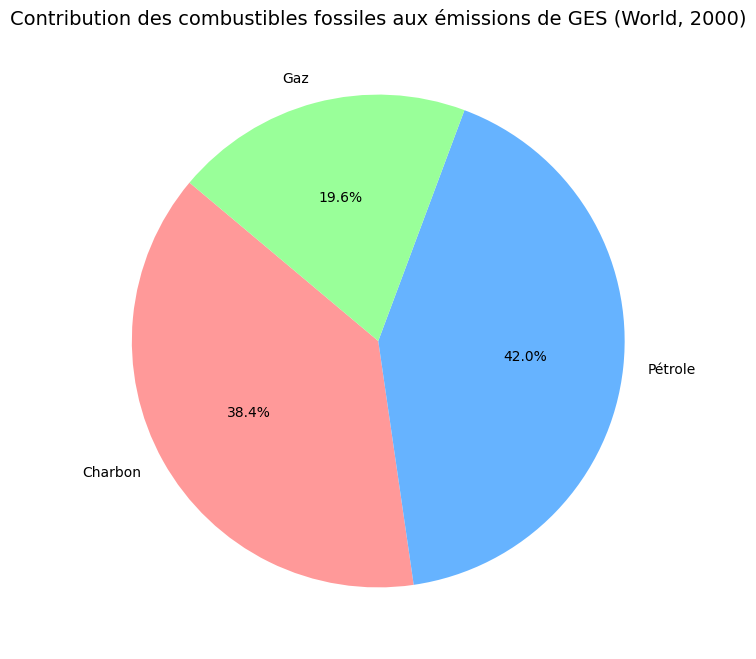

Charbon 2000 (France) : 59.93964343
Pétrole 2000 (France) : 226.8360599
Gaz 2000 (France) : 78.07339846


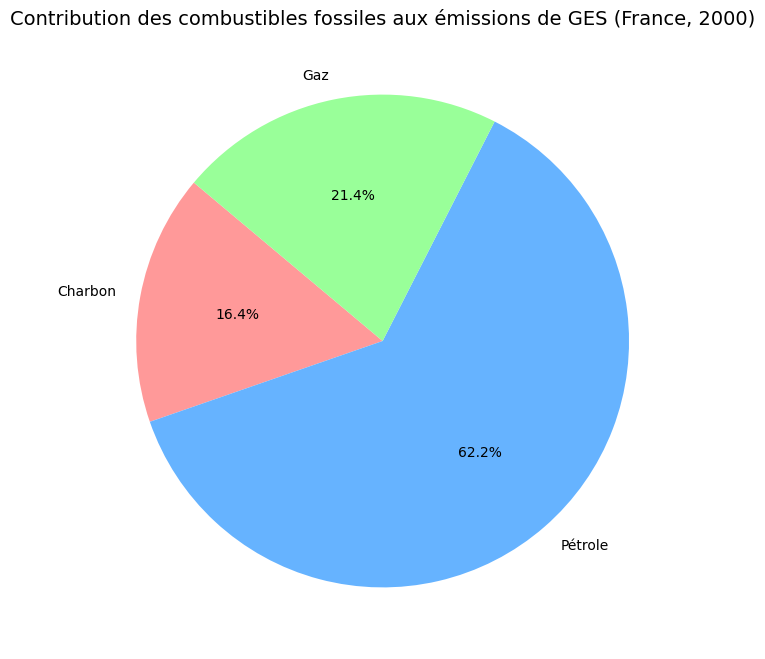

Charbon 2000 (OECD Americas) : 2360.055273
Pétrole 2000 (OECD Americas) : 2870.339645
Gaz 2000 (OECD Americas) : 1500.764966


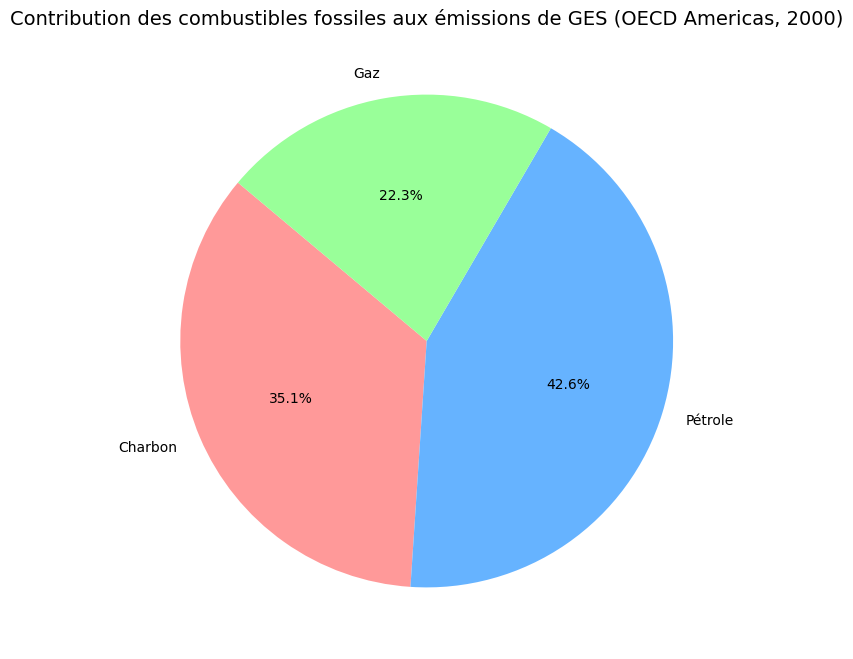

Charbon 2000 (China (incl. Hong Kong, China)) : 2559.173613
Pétrole 2000 (China (incl. Hong Kong, China)) : 555.2190858
Gaz 2000 (China (incl. Hong Kong, China)) : 42.97619044


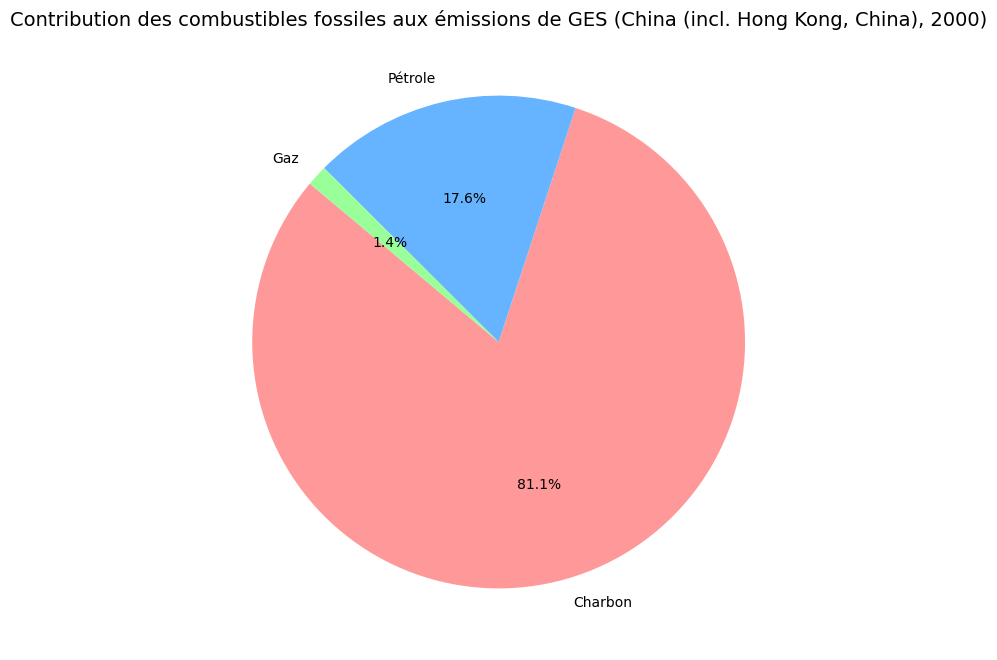

Charbon 2000 (South Africa) : 232.8966167
Pétrole 2000 (South Africa) : 50.13042756
Gaz 2000 (South Africa) : 0


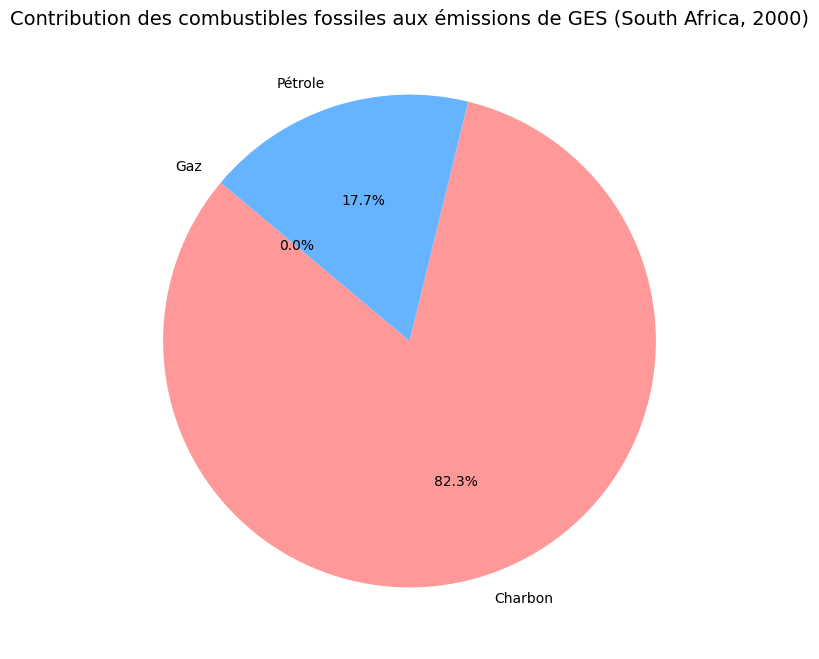

In [44]:
# Tester pour "World" en 2000
plot_fuel_contribution_pie(file_path, region="World", year=2000)

# Tester pour "France" en 2000
plot_fuel_contribution_pie(file_path, region="France", year=2000)

# Tester pour "OECD Americas" en 2000
plot_fuel_contribution_pie(file_path, region="OECD Americas", year=2000)

# Tester pour "China (incl. Hong Kong, China)" en 2000
plot_fuel_contribution_pie(file_path, region="China (incl. Hong Kong, China)", year=2000)

# Tester pour "South Africa" en 2000
plot_fuel_contribution_pie(file_path, region="South Africa", year=2000)



Charbon 2022 (World) : 15273.95144
Pétrole 2022 (World) : 11435.60931
Gaz 2022 (World) : 7457.77957


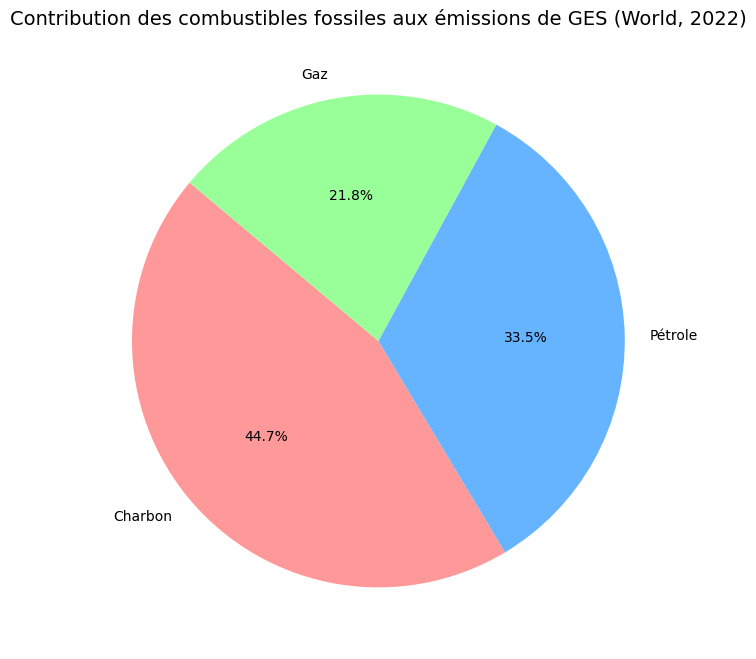

Charbon 2022 (France) : 31.73958507
Pétrole 2022 (France) : 168.5386275
Gaz 2022 (France) : 77.54869631


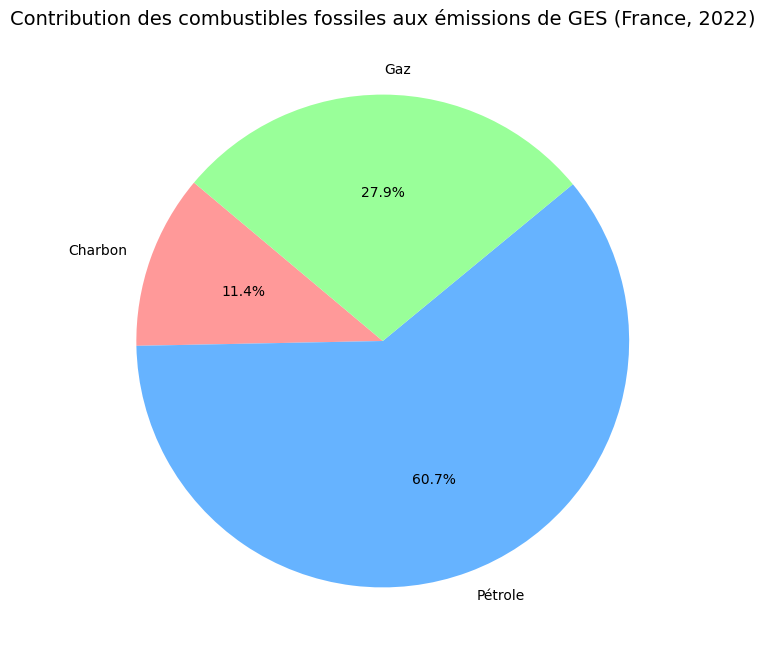

Charbon 2022 (OECD Americas) : 1032.341488
Pétrole 2022 (OECD Americas) : 2544.031182
Gaz 2022 (OECD Americas) : 2147.531323


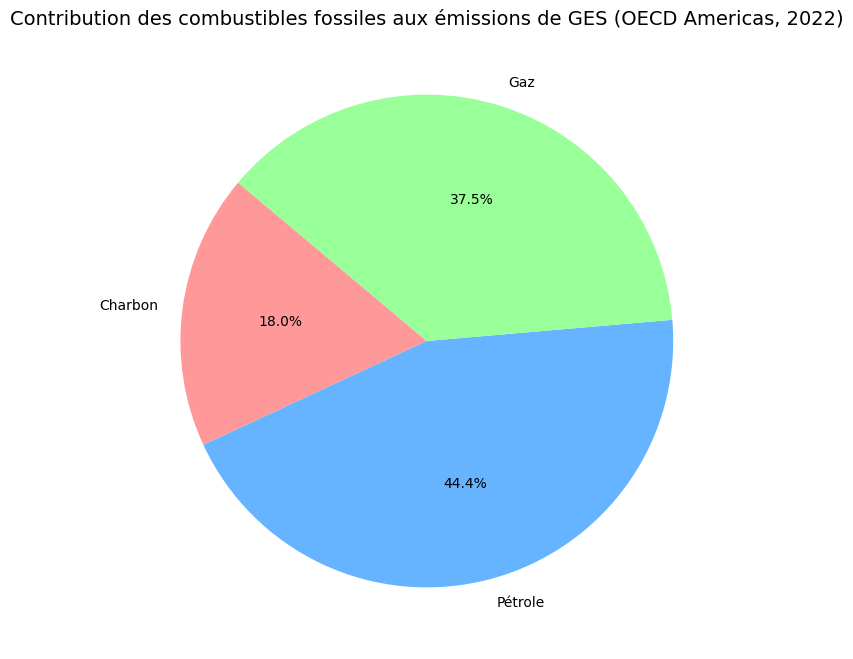

Charbon 2022 (China (incl. Hong Kong, China)) : 8410.00112
Pétrole 2022 (China (incl. Hong Kong, China)) : 1572.166498
Gaz 2022 (China (incl. Hong Kong, China)) : 715.842829


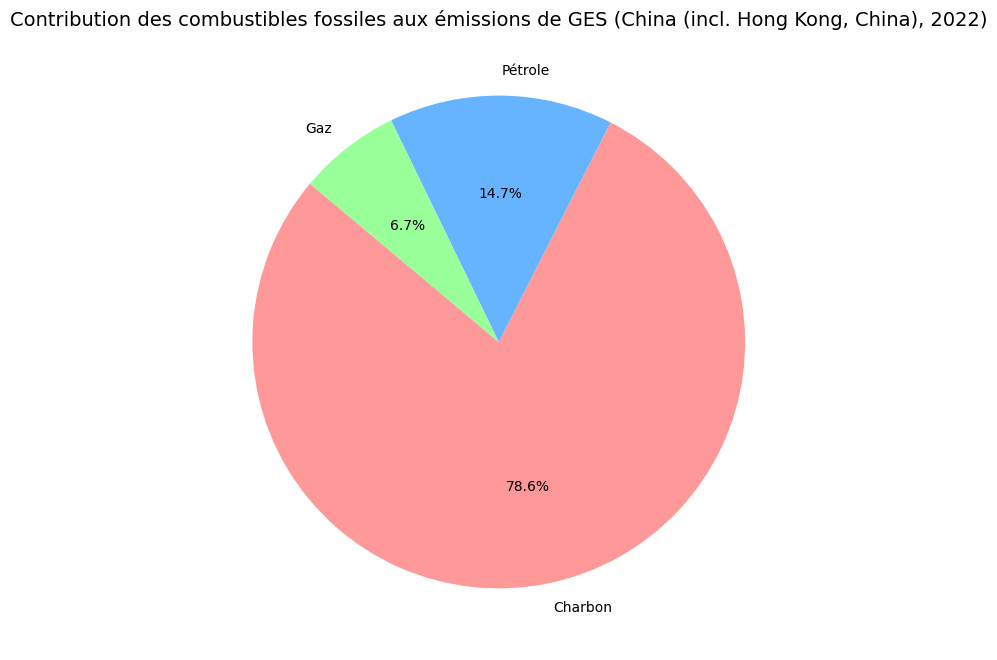

Charbon 2022 (South Africa) : 327.8395165
Pétrole 2022 (South Africa) : 66.52813139
Gaz 2022 (South Africa) : 3.327296529


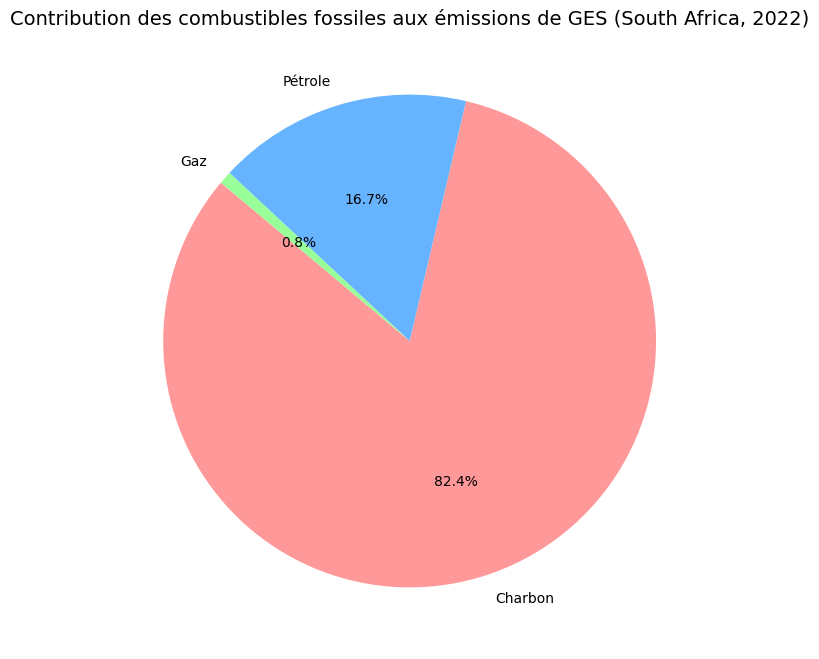

In [45]:
# Tester pour "World" en 2022
plot_fuel_contribution_pie(file_path, region="World", year=2022)

# Tester pour "France" en 2022
plot_fuel_contribution_pie(file_path, region="France", year=2022)

# Tester pour "OECD Americas" en 2022
plot_fuel_contribution_pie(file_path, region="OECD Americas", year=2022)

# Tester pour "China (incl. Hong Kong, China)" en 2022
plot_fuel_contribution_pie(file_path, region="China (incl. Hong Kong, China)", year=2022)

# Tester pour "South Africa" en 2022
plot_fuel_contribution_pie(file_path, region="South Africa", year=2022)


In [28]:
# Inspecter la feuille SECTOR
df_sector = pd.read_excel(file_path, sheet_name="SECTOR", header=None)
print("Premières lignes de la feuille SECTOR :")
display(df_sector.head(10))

Premières lignes de la feuille SECTOR :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,CO2 emissions from fuel combustion by sector i...,NaN,NaN,NaN,Source:,"IEA (2024), GHG Emissions from Energy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"IEA, All rights reserved"
1,NaN,NaN,NaN,NaN,Documentation:,Accessible here,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iea.org/terms
2,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Annex I Parties,11548.64063,4222.143895,681.661562,1499.477918,3438.860623,2932.985889,999.315178,489.608987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Annex II Parties,8765.475083,2935.437937,599.716676,1053.246461,2904.432382,2509.372163,696.585948,426.245269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,North America,5130.926139,1682.5496,380.420231,522.180178,1863.410201,1549.633937,355.972281,268.394059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sector_emissions(file_path, region="World", chart_type="pie",
                         colors=None, title_prefix="Répartition des émissions de GES par secteur"):
    """
    Génère un diagramme (circulaire ou histogramme) montrant la répartition des émissions de GES par secteur
    pour une région donnée en 2022 (feuille SECTOR).

    Paramètres :
    - file_path : Chemin vers le fichier Excel (ex. "GHGHighlights (1).xlsx")
    - region : Région ou pays à analyser (par défaut "World")
    - chart_type : Type de graphique ("pie" pour circulaire, "bar" pour histogramme, par défaut "pie")
    - colors : Liste de couleurs pour chaque secteur (par défaut None, couleurs automatiques)
    - title_prefix : Préfixe du titre (par défaut "Répartition des émissions de GES par secteur")
    """
    # Importer la feuille SECTOR avec skiprows=2 pour sauter le titre et la ligne vide
    df_sector = pd.read_excel(file_path, sheet_name="SECTOR", skiprows=2, header=None)

    # Vérifier les premières lignes
    print("Premières lignes après lecture avec skiprows=2 :")
    display(df_sector.head())

    # Définir manuellement les en-têtes (basé sur la structure de la feuille)
    expected_columns = [
        "Region", "Total CO2", "Electricity and Heat", "Other Energy Industry",
        "Manufacturing and Construction", "Transport", "Road Transport",
        "Residential", "Commercial and Public Services"
    ]
    # Conserver les 9 premières colonnes (les colonnes après contiennent des NaN ou des métadonnées)
    df_sector = df_sector.iloc[:, :9]
    df_sector.columns = expected_columns

    # Vérifier les colonnes après renommage
    print("Colonnes après renommage :", df_sector.columns.tolist())

    # Supprimer les lignes inutiles (ex. lignes vides ou sous-totaux)
    df_sector = df_sector.dropna(subset=["Region"])
    df_sector = df_sector[~df_sector["Region"].str.contains("Annex|Non-OECD|OECD TOTAL", na=False)]

    # Mettre "Region" comme index
    df_sector.set_index("Region", inplace=True)
    df_sector.index.name = "Region"
    df_sector.replace("..", pd.NA, inplace=True)
    df_sector = df_sector.astype(float, errors="ignore")

    # Vérifier si la région existe
    if region not in df_sector.index:
        print(f"Erreur : La région '{region}' n'est pas dans les données. Régions disponibles : {list(df_sector.index)}")
        return

    # Extraire les données pour la région (exclure "Total CO2" et "Road Transport")
    sector_emissions = df_sector.loc[region, ["Electricity and Heat", "Other Energy Industry",
                                             "Manufacturing and Construction", "Transport",
                                             "Residential", "Commercial and Public Services"]]

    # Supprimer les secteurs avec des données manquantes
    sector_emissions = sector_emissions.dropna()

    # Vérifier s'il y a des données
    if sector_emissions.empty:
        print(f"Erreur : Aucune donnée disponible pour '{region}' dans la feuille SECTOR.")
        return

    # Afficher les données
    print(f"Émissions par secteur pour {region} (2022) :")
    print(sector_emissions)

    # Définir les couleurs si non spécifiées
    if colors is None:
        colors = plt.cm.tab20.colors[:len(sector_emissions)]

    # Créer le graphique
    plt.figure(figsize=(10, 8))

    if chart_type == "pie":
        plt.pie(sector_emissions, labels=sector_emissions.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"{title_prefix} ({region}, 2022)", fontsize=14)
    else:  # chart_type == "bar"
        plt.bar(sector_emissions.index, sector_emissions, color=colors)
        plt.xlabel("Secteur", fontsize=12)
        plt.ylabel("Émissions (Mt CO2-équivalent)", fontsize=12)
        plt.title(f"{title_prefix} ({region}, 2022)", fontsize=14)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()

    plt.show()

Premières lignes après lecture avec skiprows=2 :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Colonnes après renommage : ['Region', 'Total CO2', 'Electricity and Heat', 'Other Energy Industry', 'Manufacturing and Construction', 'Transport', 'Road Transport', 'Residential', 'Commercial and Public Services']
Émissions par secteur pour World (2022) :
Electricity and Heat              14945.85324
Other Energy Industry              1663.19239
Manufacturing and Construction    6261.147218
Transport                          7941.00001
Residential                       1938.667678
Commercial and Public Services     779.166074
Name: World, dtype: object


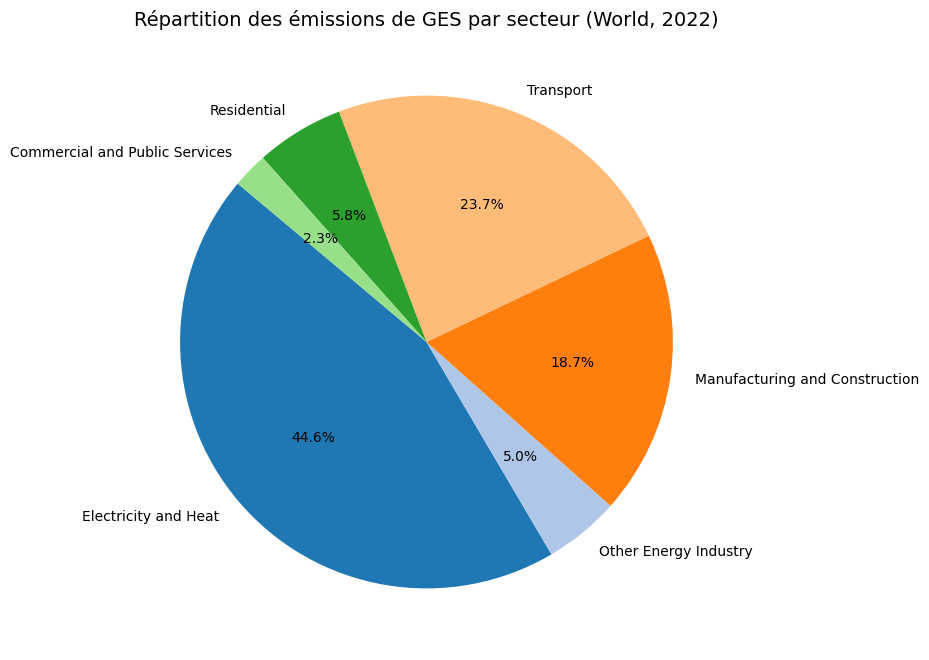

Premières lignes après lecture avec skiprows=2 :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Colonnes après renommage : ['Region', 'Total CO2', 'Electricity and Heat', 'Other Energy Industry', 'Manufacturing and Construction', 'Transport', 'Road Transport', 'Residential', 'Commercial and Public Services']
Émissions par secteur pour France (2022) :
Electricity and Heat               36.869235
Other Energy Industry              18.154497
Manufacturing and Construction     41.116371
Transport                         123.337017
Residential                        32.945196
Commercial and Public Services      17.83563
Name: France, dtype: object


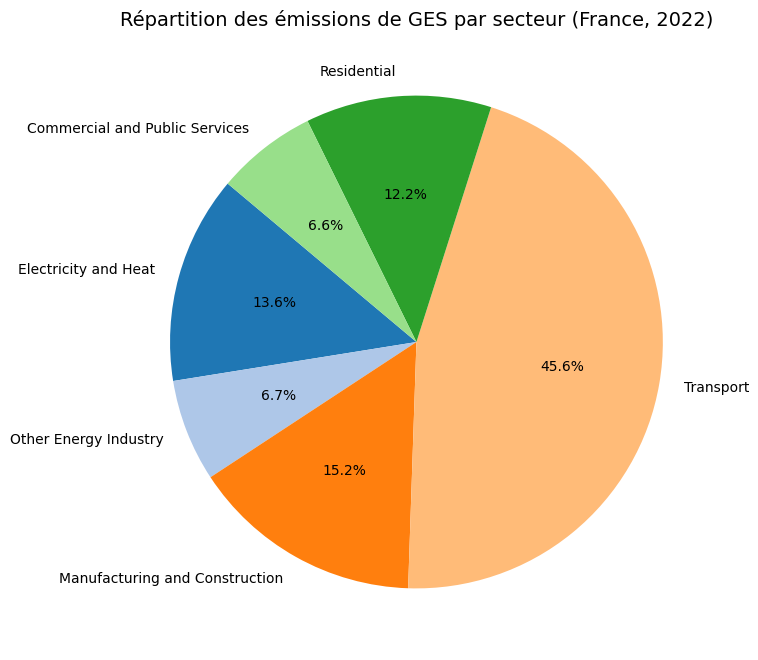

Premières lignes après lecture avec skiprows=2 :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Colonnes après renommage : ['Region', 'Total CO2', 'Electricity and Heat', 'Other Energy Industry', 'Manufacturing and Construction', 'Transport', 'Road Transport', 'Residential', 'Commercial and Public Services']
Émissions par secteur pour OECD Americas (2022) :
Electricity and Heat               1851.06015
Other Energy Industry              431.815856
Manufacturing and Construction     596.397804
Transport                         2066.212103
Residential                        385.308251
Commercial and Public Services     276.582841
Name: OECD Americas, dtype: object


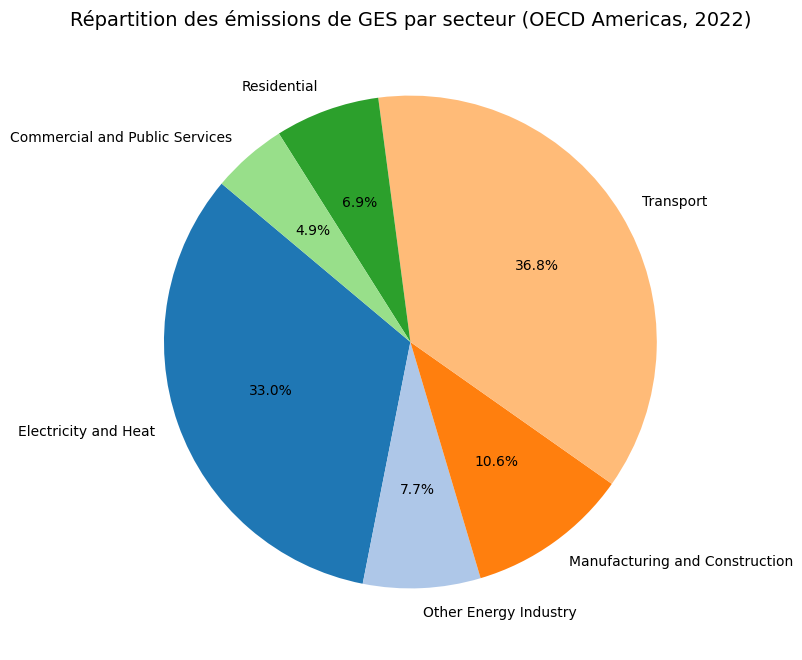

Premières lignes après lecture avec skiprows=2 :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Colonnes après renommage : ['Region', 'Total CO2', 'Electricity and Heat', 'Other Energy Industry', 'Manufacturing and Construction', 'Transport', 'Road Transport', 'Residential', 'Commercial and Public Services']
Émissions par secteur pour China (incl. Hong Kong, China) (2022) :
Electricity and Heat               6095.13636
Other Energy Industry              375.820932
Manufacturing and Construction    2710.712011
Transport                          891.428456
Residential                         323.29614
Commercial and Public Services     108.824816
Name: China (incl. Hong Kong, China), dtype: object


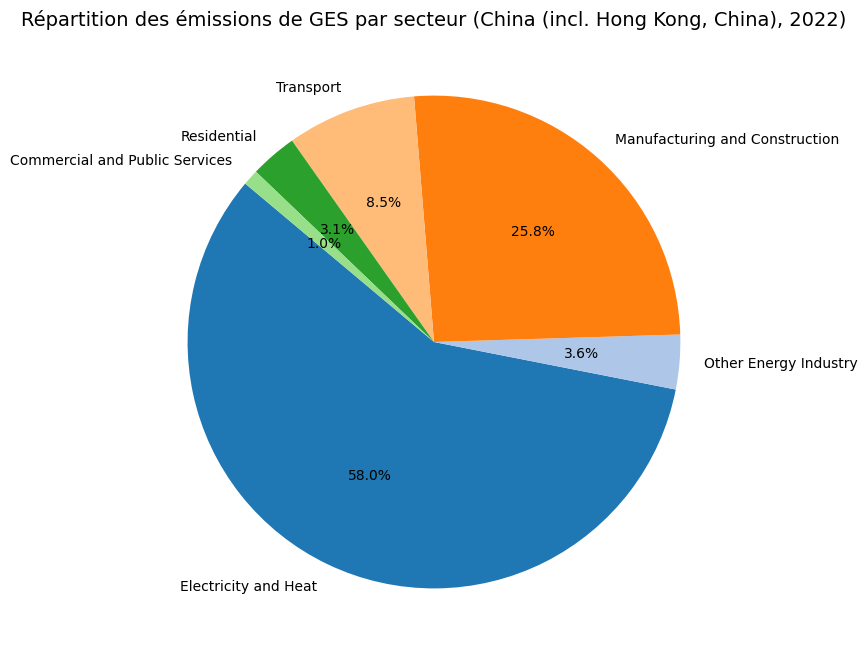

Premières lignes après lecture avec skiprows=2 :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Colonnes après renommage : ['Region', 'Total CO2', 'Electricity and Heat', 'Other Energy Industry', 'Manufacturing and Construction', 'Transport', 'Road Transport', 'Residential', 'Commercial and Public Services']
Émissions par secteur pour South Africa (2022) :
Electricity and Heat              227.788145
Other Energy Industry              49.912801
Manufacturing and Construction     45.703907
Transport                          47.778569
Residential                        10.645167
Commercial and Public Services       5.14612
Name: South Africa, dtype: object


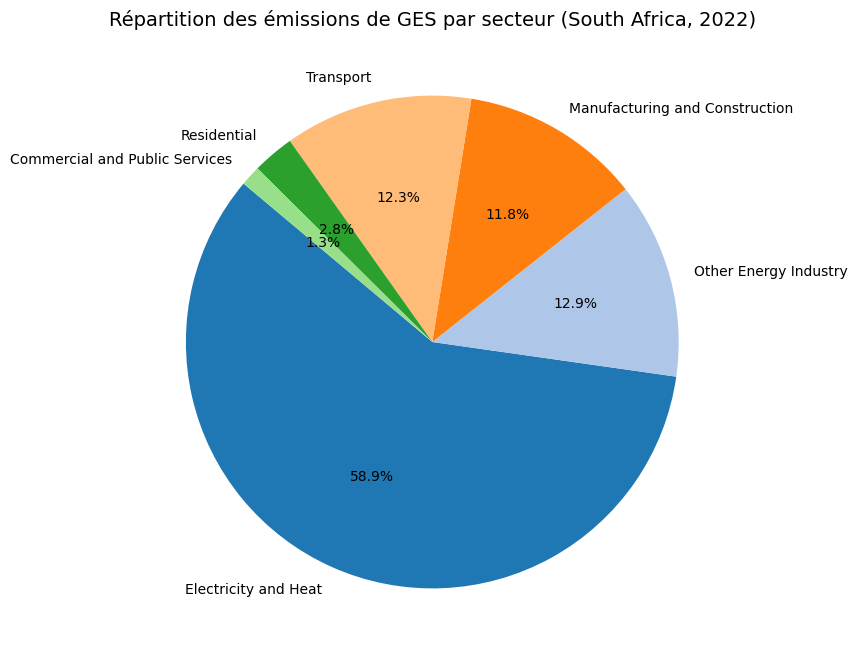

In [46]:
# Tester pour "World"
file_path = "GHGHighlights (1).xlsx"
plot_sector_emissions(file_path, region="World", chart_type="pie")

# Tester pour "France"
plot_sector_emissions(file_path, region="France", chart_type="pie")

# Tester pour "OECD Americas"
plot_sector_emissions(file_path, region="OECD Americas", chart_type="pie")

# Tester pour "China (incl. Hong Kong, China)"
plot_sector_emissions(file_path, region="China (incl. Hong Kong, China)", chart_type="pie")

# Tester pour "South Africa"
plot_sector_emissions(file_path, region="South Africa", chart_type="pie")


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_emissions_comparison(file_path, regions, year=2022):
    """
    Génère des graphiques comparatifs des émissions totales et par habitant pour plusieurs régions.

    Paramètres :
    - file_path : Chemin vers le fichier Excel
    - regions : Liste des régions/pays à comparer (ex. ["World", "France", "OECD Americas", "Canada"])
    - year : Année à analyser (par défaut 2022)
    """
    # Charger les émissions totales (feuille SECTOR)
    df_sector = pd.read_excel(file_path, sheet_name="SECTOR", skiprows=2, header=None)
    df_sector = df_sector.iloc[:, :9]
    df_sector.columns = [
        "Region", "Total CO2", "Electricity and Heat", "Other Energy Industry",
        "Manufacturing and Construction", "Transport", "Road Transport",
        "Residential", "Commercial and Public Services"
    ]
    df_sector = df_sector.dropna(subset=["Region"])
    df_sector = df_sector[~df_sector["Region"].str.contains("Annex|Non-OECD|OECD TOTAL", na=False)]
    df_sector.set_index("Region", inplace=True)
    df_sector = df_sector.astype(float, errors="ignore")

    # Charger les émissions par habitant (feuille CO2-POP)
    df_per_capita = pd.read_excel(file_path, sheet_name="CO2-POP", header=None, skiprows=4)
    years = [str(year) for year in range(1971, 2024)]
    df_per_capita.columns = ["Region"] + years
    df_per_capita.set_index("Region", inplace=True)
    df_per_capita.replace("..", pd.NA, inplace=True)
    df_per_capita = df_per_capita.astype(float, errors="ignore")

    # Vérifier les régions
    for region in regions:
        if region not in df_sector.index:
            print(f"Erreur : La région '{region}' n'est pas dans les données SECTOR.")
            return
        if region not in df_per_capita.index:
            print(f"Erreur : La région '{region}' n'est pas dans les données CO2-POP.")
            return

    # Extraire les émissions totales
    total_emissions = df_sector.loc[regions, "Total CO2"]

    # Extraire les émissions par habitant pour l'année spécifiée
    year_str = str(year)
    if year_str not in df_per_capita.columns:
        print(f"Erreur : L'année {year} n'est pas disponible dans les données CO2-POP.")
        return
    per_capita_emissions = df_per_capita.loc[regions, year_str]

    # Afficher les données
    print(f"Émissions totales ({year}) :")
    for region, value in zip(regions, total_emissions):
        print(f"{region} : {value} Mt CO2-équivalent")
    print(f"\nÉmissions par habitant ({year}) :")
    for region, value in zip(regions, per_capita_emissions):
        print(f"{region} : {value} t CO2-équivalent/habitant")

    # Créer les graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Graphique 1 : Émissions totales
    ax1.bar(regions, total_emissions, color=plt.cm.tab10.colors[:len(regions)])
    ax1.set_title(f"Émissions totales ({year})", fontsize=14)
    ax1.set_ylabel("Mt CO2-équivalent", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Graphique 2 : Émissions par habitant
    ax2.bar(regions, per_capita_emissions, color=plt.cm.tab10.colors[:len(regions)])
    ax2.set_title(f"Émissions par habitant ({year})", fontsize=14)
    ax2.set_ylabel("t CO2-équivalent/habitant", fontsize=12)
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

Émissions totales (2022) :
World : 34116.78119 Mt CO2-équivalent
France : 282.963335 Mt CO2-équivalent
OECD Americas : 5678.062697 Mt CO2-équivalent
United States : 4607.592835 Mt CO2-équivalent
Canada : 523.333304 Mt CO2-équivalent
China (incl. Hong Kong, China) : 10644.28337 Mt CO2-équivalent
India : 2516.967102 Mt CO2-équivalent
South Africa : 394.069355 Mt CO2-équivalent

Émissions par habitant (2022) :
World : 4.293 t CO2-équivalent/habitant
France : 4.133 t CO2-équivalent/habitant
OECD Americas : 9.847 t CO2-équivalent/habitant
United States : 13.813 t CO2-équivalent/habitant
Canada : 13.44 t CO2-équivalent/habitant
China (incl. Hong Kong, China) : 7.499 t CO2-équivalent/habitant
India : 1.776 t CO2-équivalent/habitant
South Africa : 6.579 t CO2-équivalent/habitant


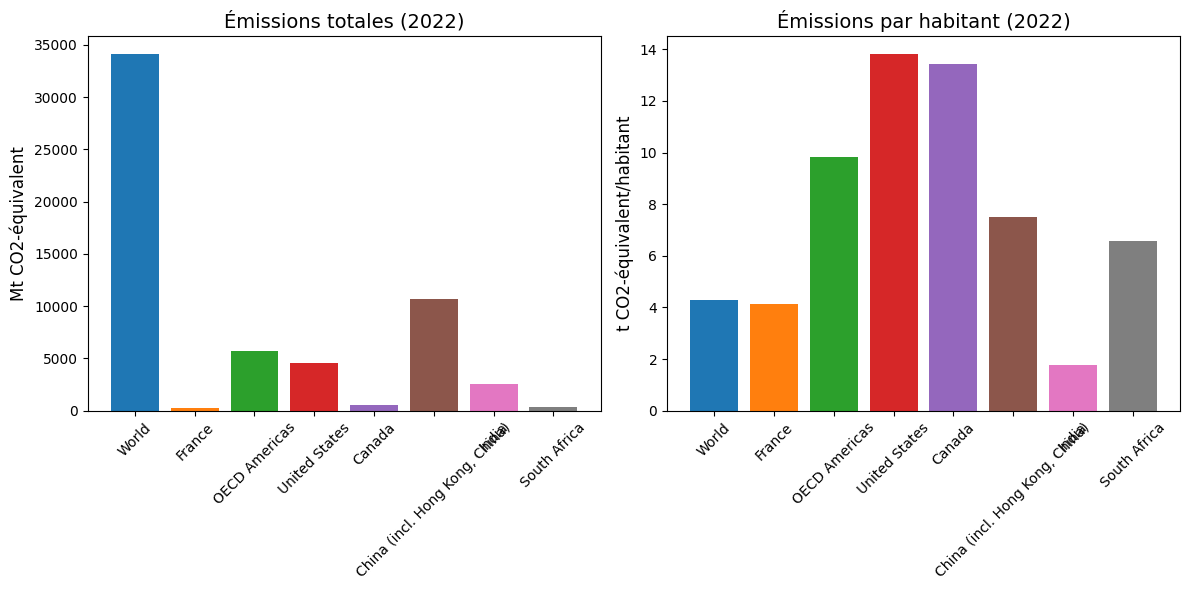

In [39]:
file_path = "GHGHighlights (1).xlsx"
plot_emissions_comparison(file_path, regions=["World", "France", "OECD Americas", "United States", "Canada", "China (incl. Hong Kong, China)", "India", "South Africa"], year=2022)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_emissions_indicators(file_path, regions, year=2022):
    """
    Génère des graphiques comparatifs des indicateurs CO2/TES et CO2/GDP pour plusieurs régions.

    Paramètres :
    - file_path : Chemin vers le fichier Excel
    - regions : Liste des régions/pays à comparer (ex. ["World", "France", "OECD Americas", "Canada"])
    - year : Année à analyser (par défaut 2022)
    """
    # Charger CO2-TES (intensité carbone de l'énergie)
    df_co2_tes = pd.read_excel(file_path, sheet_name="CO2-TES", header=None, skiprows=4)
    years = [str(year) for year in range(1971, 2024)]  # 1971 à 2023
    df_co2_tes.columns = ["Region"] + years
    df_co2_tes.set_index("Region", inplace=True)
    df_co2_tes.replace("..", pd.NA, inplace=True)
    df_co2_tes = df_co2_tes.astype(float, errors="ignore")

    # Charger CO2-GDP (intensité carbone de l’économie)
    df_co2_gdp = pd.read_excel(file_path, sheet_name="CO2-GDP", header=None, skiprows=4)
    df_co2_gdp.columns = ["Region"] + years
    df_co2_gdp.set_index("Region", inplace=True)
    df_co2_gdp.replace("..", pd.NA, inplace=True)
    df_co2_gdp = df_co2_gdp.astype(float, errors="ignore")

    # Vérifier les régions
    for region in regions:
        if region not in df_co2_tes.index or region not in df_co2_gdp.index:
            print(f"Erreur : La région '{region}' n'est pas dans les données.")
            return

    # Extraire les indicateurs pour l’année spécifiée
    co2_tes_values = [df_co2_tes.loc[region, str(year)] for region in regions]
    co2_gdp_values = [df_co2_gdp.loc[region, str(year)] for region in regions]

    # Vérifier les données manquantes
    if any(pd.isna(x) for x in co2_tes_values) or any(pd.isna(x) for x in co2_gdp_values):
        print(f"Erreur : Données manquantes pour une ou plusieurs régions en {year}.")
        return

    # Afficher les données
    print(f"CO2/TES ({year}) :")
    for region, value in zip(regions, co2_tes_values):
        print(f"{region} : {value} t CO2-équivalent/TJ")
    print(f"\nCO2/GDP ({year}) :")
    for region, value in zip(regions, co2_gdp_values):
        print(f"{region} : {value} t CO2-équivalent/M$")

    # Créer les graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Graphique 1 : CO2/TES
    ax1.bar(regions, co2_tes_values, color=plt.cm.tab10.colors[:len(regions)])
    ax1.set_title(f"Intensité carbone de l’énergie ({year})", fontsize=14)
    ax1.set_ylabel("t CO2-équivalent/TJ", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Graphique 2 : CO2/GDP
    ax2.bar(regions, co2_gdp_values, color=plt.cm.tab10.colors[:len(regions)])
    ax2.set_title(f"Intensité carbone de l’économie ({year})", fontsize=14)
    ax2.set_ylabel("t CO2-équivalent/M$", fontsize=12)
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

CO2/TES (2022) :
World : 54.836 t CO2-équivalent/TJ
France : 32.006 t CO2-équivalent/TJ
OECD Americas : 49.506 t CO2-équivalent/TJ
United States : 50.645 t CO2-équivalent/TJ
Canada : 42.062 t CO2-équivalent/TJ
India : 59.214 t CO2-équivalent/TJ
China (incl. Hong Kong, China) : 66.71 t CO2-équivalent/TJ
South Africa : 76.337 t CO2-équivalent/TJ

CO2/GDP (2022) :
World : 0.378 t CO2-équivalent/M$
France : 0.107 t CO2-équivalent/M$
OECD Americas : 0.227 t CO2-équivalent/M$
United States : 0.217 t CO2-équivalent/M$
Canada : 0.297 t CO2-équivalent/M$
India : 0.846 t CO2-équivalent/M$
China (incl. Hong Kong, China) : 0.637 t CO2-équivalent/M$
South Africa : 1.093 t CO2-équivalent/M$


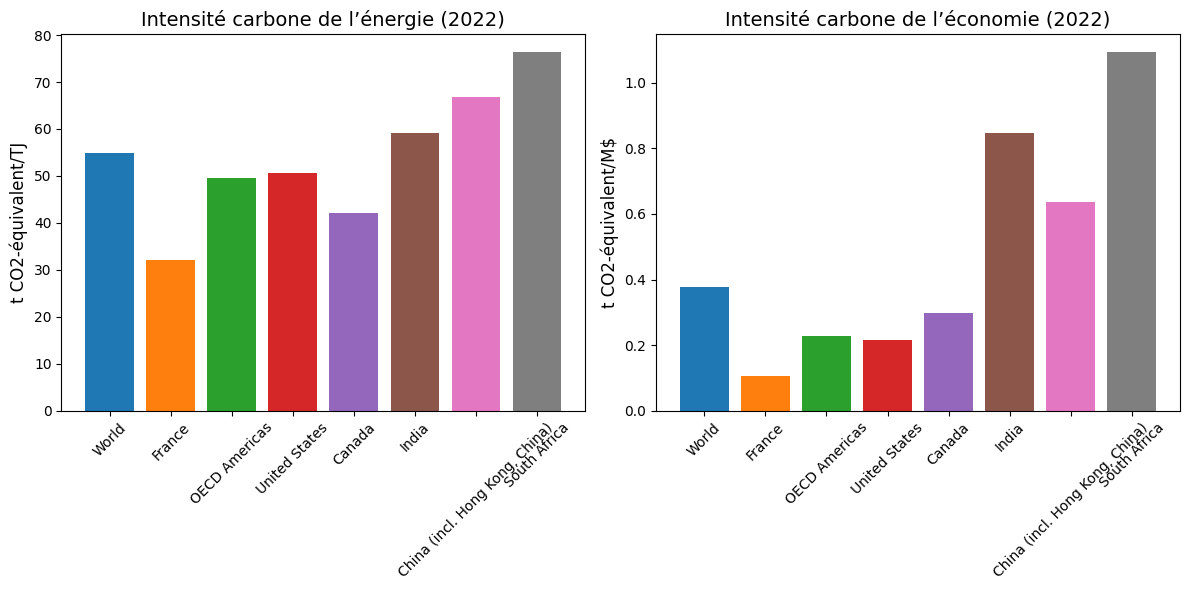

In [41]:
plot_emissions_indicators(file_path, regions=["World", "France", "OECD Americas", "United States", "Canada", "India", "China (incl. Hong Kong, China)", "South Africa"], year=2022)

In [47]:
df_co2_pop = pd.read_excel(file_path, sheet_name="CO2-POP", header=None)
print("Premières lignes de CO2-POP :")
display(df_co2_pop.head(10))

Premières lignes de CO2-POP :


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,CO2 emissions / population,NaN,NaN,NaN,NaN,NaN,NaN,Source:,NaN,"IEA (2024), GHG Emissions from Energy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentation:,NaN,Accessible here,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Back to the table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tonnes CO2 / capita,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,World,3.704,3.803,3.942,3.859,3.803,3.935,3.998,4.046,4.095,...,4.445,4.377,4.33,4.351,4.402,4.346,4.071,4.272,4.293,..
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Annex I Parties,..,..,..,..,..,..,..,..,..,...,9.625,9.452,9.329,9.271,9.32,9.002,8.238,8.741,8.648,..
8,Annex II Parties,12.162,12.59,13.142,12.706,12.122,12.721,12.873,12.865,13.059,...,10.587,10.4,10.21,10.063,10.073,9.688,8.749,9.211,9.158,..
9,North America,20.158,21.047,21.613,20.808,19.793,20.726,21.241,20.983,20.928,...,15.745,15.277,14.901,14.606,14.945,14.391,12.87,13.648,13.774,..


In [48]:
import pandas as pd

# Charger CO2-POP
df_co2_pop = pd.read_excel(file_path, sheet_name="CO2-POP", header=None, skiprows=4)
years = [str(year) for year in range(1971, 2024)]  # 1971 à 2023
df_co2_pop.columns = ["Region"] + years
df_co2_pop.set_index("Region", inplace=True)
df_co2_pop.replace("..", pd.NA, inplace=True)
df_co2_pop = df_co2_pop.astype(float, errors="ignore")

# Régions d'intérêt
regions = ["World", "France", "OECD Americas","United States", "Canada", "India", "China (incl. Hong Kong, China)", "South Africa"]
# Extraire les valeurs pour 2022
co2_pop_values = {region: df_co2_pop.loc[region, "2022"] for region in regions if region in df_co2_pop.index}

# Afficher les résultats
print("CO2/POP (2022) :")
for region, value in co2_pop_values.items():
    print(f"{region} : {value} t CO2-équivalent/habitant")

CO2/POP (2022) :
World : 4.293 t CO2-équivalent/habitant
France : 4.133 t CO2-équivalent/habitant
OECD Americas : 9.847 t CO2-équivalent/habitant
United States : 13.813 t CO2-équivalent/habitant
Canada : 13.44 t CO2-équivalent/habitant
India : 1.776 t CO2-équivalent/habitant
China (incl. Hong Kong, China) : 7.499 t CO2-équivalent/habitant
South Africa : 6.579 t CO2-équivalent/habitant


In [20]:
import pandas as pd

# Charger les données
file_path = "GHGHighlights (1).xlsx"

# 1. Émissions par secteur (feuille "SECTOR")
df_sector = pd.read_excel(file_path, sheet_name="SECTOR", skiprows=2, header=None)
df_sector = df_sector.iloc[:, :9]
df_sector.columns = [
    "Region", "Total CO2", "Electricity and Heat", "Other Energy Industry",
    "Manufacturing and Construction", "Transport", "Road Transport",
    "Residential", "Commercial and Public Services"
]
df_sector = df_sector.dropna(subset=["Region"])
df_sector = df_sector[~df_sector["Region"].str.contains("Annex|Non-OECD|OECD TOTAL", na=False)]
df_sector.set_index("Region", inplace=True)
df_sector = df_sector.astype(float, errors="ignore")

# 2. CO2/TES (feuille "CO2-TES")
df_co2_tes = pd.read_excel(file_path, sheet_name="CO2-TES", header=None, skiprows=4)
years = [str(year) for year in range(1971, 2024)]
df_co2_tes.columns = ["Region"] + years
df_co2_tes.set_index("Region", inplace=True)
df_co2_tes.replace("..", pd.NA, inplace=True)
df_co2_tes = df_co2_tes.astype(float, errors="ignore")

# 3. CO2/GDP (feuille "CO2-GDP")
df_co2_gdp = pd.read_excel(file_path, sheet_name="CO2-GDP", header=None, skiprows=4)
df_co2_gdp.columns = ["Region"] + years
df_co2_gdp.set_index("Region", inplace=True)
df_co2_gdp.replace("..", pd.NA, inplace=True)
df_co2_gdp = df_co2_gdp.astype(float, errors="ignore")

# 4. CO2/POP (feuille "CO2-POP")
df_co2_pop = pd.read_excel(file_path, sheet_name="CO2-POP", header=None, skiprows=4)
df_co2_pop.columns = ["Region"] + years
df_co2_pop.set_index("Region", inplace=True)
df_co2_pop.replace("..", pd.NA, inplace=True)
df_co2_pop = df_co2_pop.astype(float, errors="ignore")

# Régions d'intérêt
regions = ["World", "France", "OECD Americas", "Canada", "India", "Togo", "Zambia", "South Africa"]

# Construire le DataFrame consolidé
data = {
    "Region": [],
    "Electricity and Heat": [],
    "Transport": [],
    "CO2/TES": [],
    "CO2/GDP": [],
    "CO2/POP": []
}

for region in regions:
    if (region in df_sector.index) and (region in df_co2_tes.index) and (region in df_co2_gdp.index) and (region in df_co2_pop.index):
        data["Region"].append(region)
        data["Electricity and Heat"].append(df_sector.loc[region, "Electricity and Heat"])
        data["Transport"].append(df_sector.loc[region, "Transport"])
        data["CO2/TES"].append(df_co2_tes.loc[region, "2022"])
        data["CO2/GDP"].append(df_co2_gdp.loc[region, "2022"])
        data["CO2/POP"].append(df_co2_pop.loc[region, "2022"])
    else:
        print(f"Région '{region}' manquante dans une ou plusieurs feuilles.")

# Créer le DataFrame
df_consolidated = pd.DataFrame(data)
df_consolidated.set_index("Region", inplace=True)

# Afficher le DataFrame
print("Jeu de données consolidé :")
print(df_consolidated)

Jeu de données consolidé :
               Electricity and Heat    Transport  CO2/TES  CO2/GDP  CO2/POP
Region                                                                     
World                  14945.853240  7941.000010   54.836    0.378    4.293
France                    36.869235   123.337017   32.006    0.107    4.133
OECD Americas           1851.060150  2066.212103   49.506    0.227    9.847
Canada                    72.775805   163.982193   42.062    0.297   13.440
India                   1327.130340   323.762305   59.214    0.846    1.776
Togo                       0.346599     1.233472   11.847    0.241    0.217
Zambia                     3.129258     2.491718   13.383    0.345    0.452
South Africa             227.788145    47.778569   76.337    1.093    6.579


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def apply_pca_emissions(df, regions):
    """
    Applique la PCA sur les données d'émissions pour explorer les relations entre les régions.

    Paramètres :
    - df : DataFrame contenant les données consolidées (colonnes : indicateurs, lignes : régions)
    - regions : Liste des régions à inclure dans l'analyse
    """
    # Filtrer les régions
    df_pca = df.loc[regions].dropna()

    # Standardiser les données (moyenne = 0, écart-type = 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_pca)

    # Appliquer la PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Variance expliquée
    explained_variance = pca.explained_variance_ratio_
    print(f"Variance expliquée par PC1 : {explained_variance[0]:.2%}")
    print(f"Variance expliquée par PC2 : {explained_variance[1]:.2%}")

    # Visualisation
    plt.figure(figsize=(8, 6))
    for i, region in enumerate(df_pca.index):
        plt.scatter(X_pca[i, 0], X_pca[i, 1], label=region)
        plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1], region, fontsize=9)

    plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance expliquée)")
    plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance expliquée)")
    plt.title("PCA des émissions et indicateurs (2022)")
    plt.grid(True)
    plt.show()

    # Contributions des variables aux composantes principales
    components = pd.DataFrame(pca.components_, columns=df_pca.columns, index=["PC1", "PC2"])
    print("\nContributions des variables aux composantes principales :")
    print(components)

Variance expliquée par PC1 : 43.40%
Variance expliquée par PC2 : 34.02%


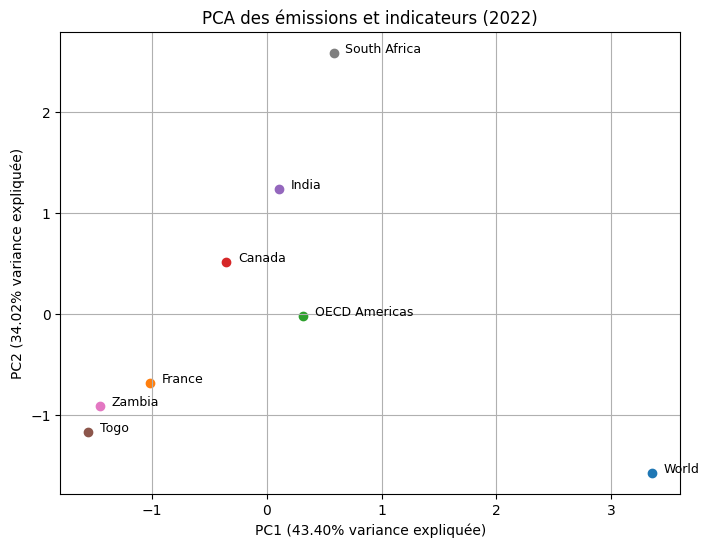


Contributions des variables aux composantes principales :
     Electricity and Heat  Transport   CO2/TES   CO2/GDP   CO2/POP
PC1              0.608427   0.606598  0.454774  0.176930  0.154052
PC2             -0.324279  -0.341553  0.552611  0.634032  0.266100


In [22]:
# Appliquer la PCA
apply_pca_emissions(df_consolidated, regions=["World", "France", "OECD Americas", "Canada", "India", "Togo", "Zambia", "South Africa"])

Clusters des régions :
               Cluster
Region                
World                2
France               1
OECD Americas        0
Canada               0
India                1
Togo                 1
Zambia               1
South Africa         0


In [34]:
import pandas as pd

# Chemin du fichier
file_path = "GHGHighlights (1).xlsx"

# Charger les données
# 1. Émissions par secteur (feuille "SECTOR")
df_sector = pd.read_excel(file_path, sheet_name="SECTOR", skiprows=2, header=None)
df_sector = df_sector.iloc[:, :9]
df_sector.columns = [
    "Region", "Total CO2", "Electricity and Heat", "Other Energy Industry",
    "Manufacturing and Construction", "Transport", "Road Transport",
    "Residential", "Commercial and Public Services"
]
df_sector = df_sector.dropna(subset=["Region"])
df_sector = df_sector[~df_sector["Region"].str.contains("Annex|Non-OECD|OECD TOTAL", na=False)]
df_sector.set_index("Region", inplace=True)
df_sector = df_sector.astype(float, errors="ignore")

# 2. CO2/TES (feuille "CO2-TES")
df_co2_tes = pd.read_excel(file_path, sheet_name="CO2-TES", header=None, skiprows=4)
years = [str(year) for year in range(1971, 2024)]
df_co2_tes.columns = ["Region"] + years
df_co2_tes.set_index("Region", inplace=True)
df_co2_tes.replace("..", pd.NA, inplace=True)
df_co2_tes = df_co2_tes.astype(float, errors="ignore")

# 3. CO2/GDP (feuille "CO2-GDP")
df_co2_gdp = pd.read_excel(file_path, sheet_name="CO2-GDP", header=None, skiprows=4)
df_co2_gdp.columns = ["Region"] + years
df_co2_gdp.set_index("Region", inplace=True)
df_co2_gdp.replace("..", pd.NA, inplace=True)
df_co2_gdp = df_co2_gdp.astype(float, errors="ignore")

# 4. CO2/POP (feuille "CO2-POP")
df_co2_pop = pd.read_excel(file_path, sheet_name="CO2-POP", header=None, skiprows=4)
df_co2_pop.columns = ["Region"] + years
df_co2_pop.set_index("Region", inplace=True)
df_co2_pop.replace("..", pd.NA, inplace=True)
df_co2_pop = df_co2_pop.astype(float, errors="ignore")

# Liste des 95 pays
countries = [
    "United States", "Canada", "Mexico", "Brazil", "Argentina",
    "France", "Germany", "United Kingdom", "Russian Federation", "South Africa",
    "Nigeria", "Kenya", "China (incl. Hong Kong, China)", "India", "Japan",
    "Korea", "Indonesia", "Saudi Arabia", "Islamic Rep. of Iran", "Australia", "Egypt",
    "Costa Rica", "Jamaica", "Panama", "Dominican Republic", "Cuba",
    "Chile", "Peru", "Colombia", "Venezuela", "Ecuador", "Bolivia", "Paraguay", "Uruguay",
    "Italy", "Spain", "Poland", "Ukraine", "Netherlands", "Belgium", "Sweden", "Norway",
    "Finland", "Denmark", "Austria", "Switzerland", "Greece", "Portugal",
    "Czech Republic", "Hungary", "Romania", "Slovak Republic", "Ireland", "Bulgaria",
    "Algeria", "Morocco", "Ghana", "Ethiopia", "Uganda", "United Rep. of Tanzania", "Zimbabwe", "Zambia",
    "Angola", "Sudan", "Tunisia", "Cameroon", "Senegal", "Mozambique",
    "Thailand", "Philippines", "Malaysia", "Pakistan", "Bangladesh", "Sri Lanka",
    "Nepal", "Myanmar", "Singapore", "Kazakhstan", "Uzbekistan", "Turkmenistan",
    "Mongolia", "Cambodia", "Lao People's Democratic Republic",
    "United Arab Emirates", "Iraq", "Kuwait", "Qatar", "Oman", "Jordan", "Lebanon", "Syrian Arab Republic",
    "New Zealand",
    "Israel", "Chile", "Georgia", "Armenia"
]
# Construire le DataFrame consolidé
data = {
    "Region": [],
    "Total CO2 (Mt)": [],
    "Electricity and Heat (Mt)": [],
    "Transport (Mt)": [],
    "Residential (Mt)": [],
    "Manufacturing and Construction (Mt)": [],
    "CO2/TES (t/TJ)": [],
    "CO2/GDP (t/M$)": [],
    "CO2/POP (t/habitant)": [],
    "GDP per Capita (M$/habitant)": [],
    "Energy Intensity (TJ/M$)": []
}

for country in countries:
    if (country in df_sector.index) and (country in df_co2_tes.index) and (country in df_co2_gdp.index) and (country in df_co2_pop.index):
        data["Region"].append(country)
        data["Total CO2 (Mt)"].append(df_sector.loc[country, "Total CO2"])
        data["Electricity and Heat (Mt)"].append(df_sector.loc[country, "Electricity and Heat"])
        data["Transport (Mt)"].append(df_sector.loc[country, "Transport"])
        data["Residential (Mt)"].append(df_sector.loc[country, "Residential"])
        data["Manufacturing and Construction (Mt)"].append(df_sector.loc[country, "Manufacturing and Construction"])
        data["CO2/TES (t/TJ)"].append(df_co2_tes.loc[country, "2022"])
        data["CO2/GDP (t/M$)"].append(df_co2_gdp.loc[country, "2022"])
        data["CO2/POP (t/habitant)"].append(df_co2_pop.loc[country, "2022"])
        # Calculer GDP per Capita
        co2_pop = df_co2_pop.loc[country, "2022"]
        co2_gdp = df_co2_gdp.loc[country, "2022"]
        gdp_per_capita = co2_pop / co2_gdp if co2_gdp != 0 else pd.NA
        data["GDP per Capita (M$/habitant)"].append(gdp_per_capita)
        # Calculer Energy Intensity (TES/GDP)
        co2_tes = df_co2_tes.loc[country, "2022"]
        energy_intensity = co2_tes / co2_gdp if co2_gdp != 0 else pd.NA
        data["Energy Intensity (TJ/M$)"].append(energy_intensity)
    else:
        print(f"Pays '{country}' manquant dans une ou plusieurs feuilles.")

# Créer le DataFrame
df_consolidated = pd.DataFrame(data)
df_consolidated.set_index("Region", inplace=True)

# Afficher le DataFrame
print("Jeu de données consolidé pour 2022 :")
display(df_consolidated)

Pays 'Syrian Arab Republic' manquant dans une ou plusieurs feuilles.
Jeu de données consolidé pour 2022 :


,Total CO2 (Mt),Electricity and Heat (Mt),Transport (Mt),Residential (Mt),Manufacturing and Construction (Mt),CO2/TES (t/TJ),CO2/GDP (t/M$),CO2/POP (t/habitant),GDP per Capita (M$/habitant),Energy Intensity (TJ/M$)
Region,,,,,,,,,,
United States,4607.592835,1609.773795,1699.428008,317.883505,455.423051,50.645,0.217,13.813,63.654378,233.387097
Canada,523.333304,72.775805,163.982193,38.088776,66.757127,42.062,0.297,13.440,45.252525,141.622896
Mexico,379.679001,126.289458,129.811634,18.732585,45.064065,49.662,0.295,2.953,10.010169,168.345763
Brazil,413.935487,50.414077,212.576952,18.031451,89.223951,32.898,0.218,1.922,8.816514,150.908257
Argentina,174.324935,44.979053,50.950150,25.826204,21.582832,50.688,0.270,3.770,13.962963,187.733333
...,...,...,...,...,...,...,...,...,...,...
New Zealand,28.689602,4.241948,14.636658,0.657582,5.876796,35.903,0.133,5.579,41.947368,269.947368
Israel,59.596785,33.124829,18.686330,0.477780,3.596516,59.663,0.146,6.240,42.739726,408.650685
Chile,86.586855,29.351543,31.188794,4.656332,15.992587,49.943,0.310,4.367,14.087097,161.106452


Pays 'Syrian Arab Republic' manquant dans une ou plusieurs feuilles.
Variance expliquée par PC1 : 44.72%
Variance expliquée par PC2 : 22.14%
Variance expliquée par PC3 : 15.61%
Qualité globale d'explication (qge) avec 3 axes : 82.47%
Pays significatifs sélectionnés (limités à 25) :
['China (incl. Hong Kong, China)', 'United States', 'Ireland', 'Switzerland', 'Qatar', 'Turkmenistan', 'India', 'Mongolia', 'Russian Federation', 'Norway', 'Denmark', 'Islamic Rep. of Iran', 'Kuwait', 'Kazakhstan', 'Venezuela']


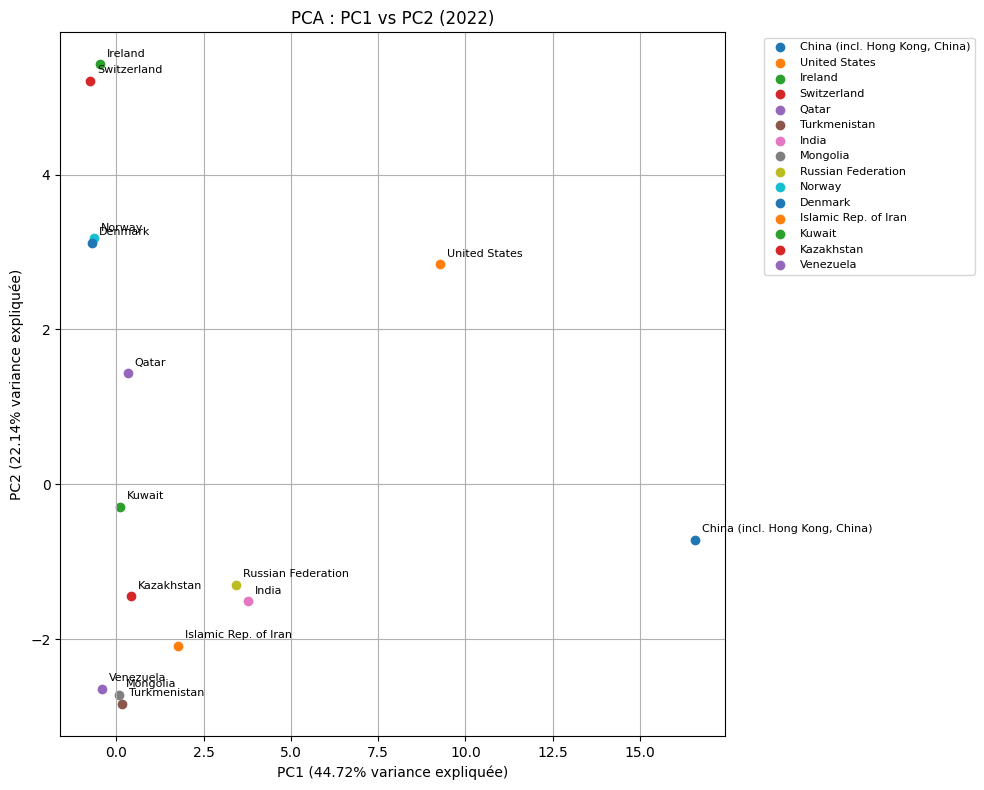

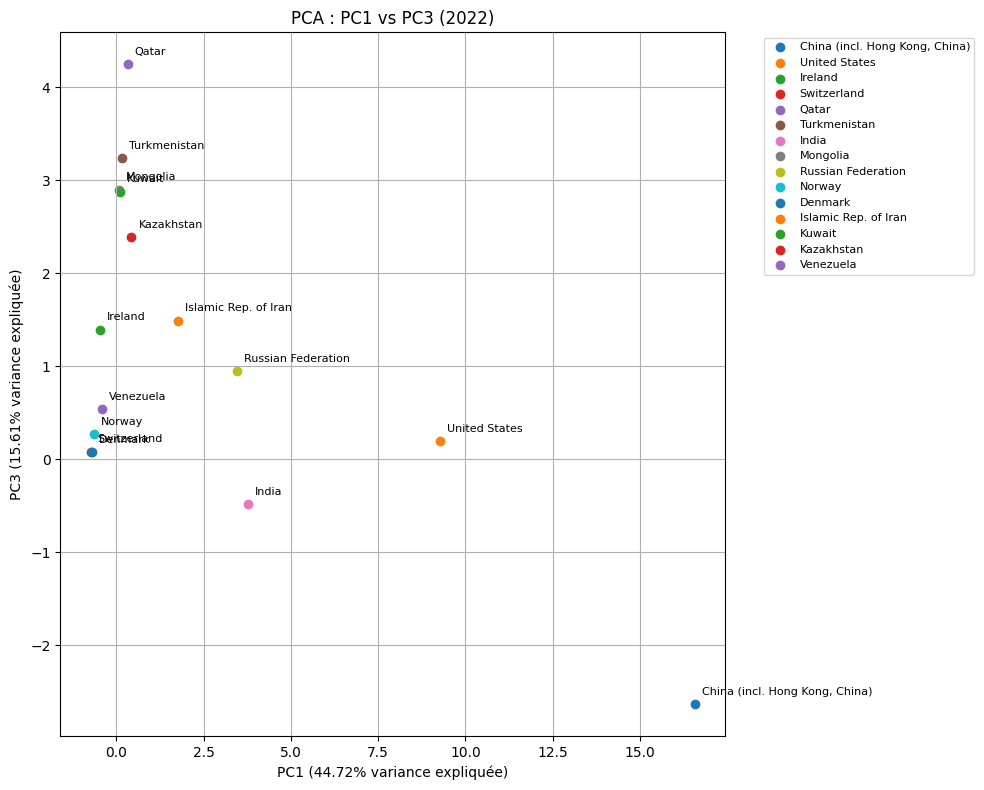

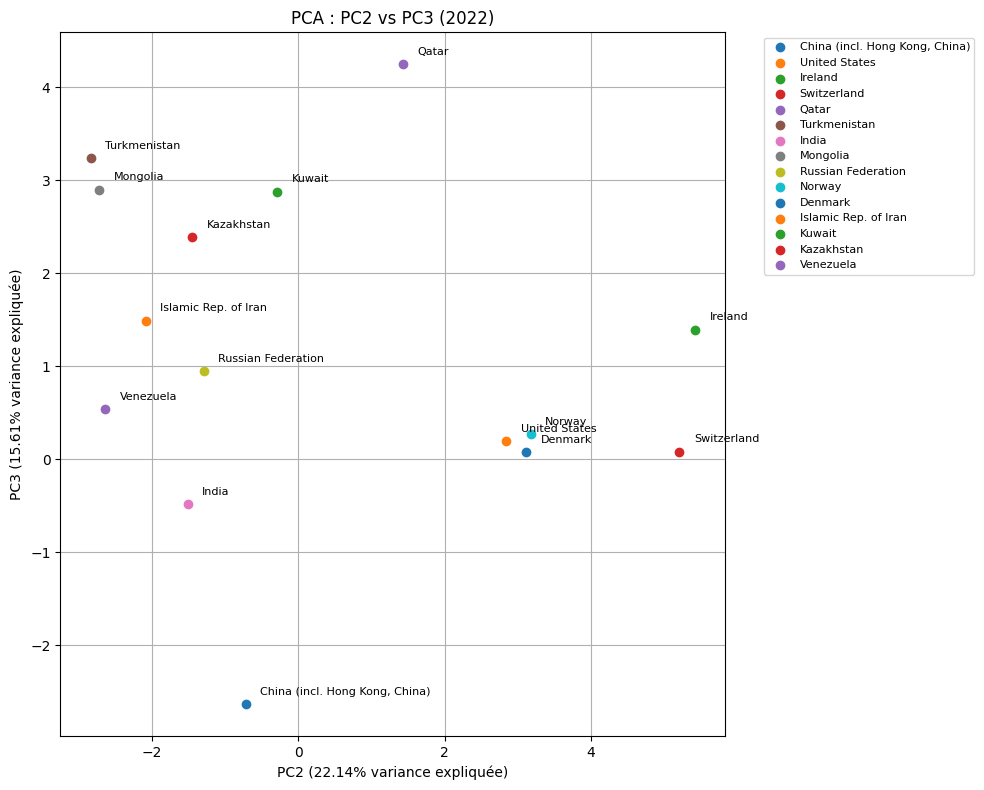


Contributions des variables aux composantes principales :


,Total CO2 (Mt),Electricity and Heat (Mt),Transport (Mt),Residential (Mt),Manufacturing and Construction (Mt),CO2/TES (t/TJ),CO2/GDP (t/M$),CO2/POP (t/habitant),GDP per Capita (M$/habitant),Energy Intensity (TJ/M$)
PC1,0.464610,0.449873,0.393985,0.437989,0.436430,0.136732,0.080404,0.127294,0.043644,-0.030873
PC2,0.001703,-0.022379,0.098365,0.033531,-0.031861,-0.124035,-0.476970,0.134269,0.606298,0.599308
PC3,-0.113907,-0.129058,-0.036363,-0.027386,-0.143359,0.547486,0.418668,0.631913,0.269521,0.027660


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Liste des 95 pays
countries = [
    "United States", "Canada", "Mexico", "Brazil", "Argentina",
    "France", "Germany", "United Kingdom", "Russian Federation", "South Africa",
    "Nigeria", "Kenya", "China (incl. Hong Kong, China)", "India", "Japan",
    "Korea", "Indonesia", "Saudi Arabia", "Islamic Rep. of Iran", "Australia", "Egypt",
    "Costa Rica", "Jamaica", "Panama", "Dominican Republic", "Cuba",
    "Chile", "Peru", "Colombia", "Venezuela", "Ecuador", "Bolivia", "Paraguay", "Uruguay",
    "Italy", "Spain", "Poland", "Ukraine", "Netherlands", "Belgium", "Sweden", "Norway",
    "Finland", "Denmark", "Austria", "Switzerland", "Greece", "Portugal",
    "Czech Republic", "Hungary", "Romania", "Slovak Republic", "Ireland", "Bulgaria",
    "Algeria", "Morocco", "Ghana", "Ethiopia", "Uganda", "United Rep. of Tanzania", "Zimbabwe", "Zambia",
    "Angola", "Sudan", "Tunisia", "Cameroon", "Senegal", "Mozambique",
    "Thailand", "Philippines", "Malaysia", "Pakistan", "Bangladesh", "Sri Lanka",
    "Nepal", "Myanmar", "Singapore", "Kazakhstan", "Uzbekistan", "Turkmenistan",
    "Mongolia", "Cambodia", "Lao People's Democratic Republic",
    "United Arab Emirates", "Iraq", "Kuwait", "Qatar", "Oman", "Jordan", "Lebanon", "Syrian Arab Republic",
    "New Zealand",
    "Israel", "Chile", "Georgia", "Armenia"
]

# Chemin du fichier
file_path = "GHGHighlights (1).xlsx"

# Charger les données
df_sector = pd.read_excel(file_path, sheet_name="SECTOR", skiprows=2, header=None)
df_sector = df_sector.iloc[:, :9]
df_sector.columns = [
    "Region", "Total CO2", "Electricity and Heat", "Other Energy Industry",
    "Manufacturing and Construction", "Transport", "Road Transport",
    "Residential", "Commercial and Public Services"
]
df_sector = df_sector.dropna(subset=["Region"])
df_sector = df_sector[~df_sector["Region"].str.contains("Annex|Non-OECD|OECD TOTAL", na=False)]
df_sector.set_index("Region", inplace=True)
df_sector = df_sector.astype(float, errors="ignore")

df_co2_tes = pd.read_excel(file_path, sheet_name="CO2-TES", header=None, skiprows=4)
years = [str(year) for year in range(1971, 2024)]
df_co2_tes.columns = ["Region"] + years
df_co2_tes.set_index("Region", inplace=True)
df_co2_tes.replace("..", pd.NA, inplace=True)
df_co2_tes = df_co2_tes.astype(float, errors="ignore")

df_co2_gdp = pd.read_excel(file_path, sheet_name="CO2-GDP", header=None, skiprows=4)
df_co2_gdp.columns = ["Region"] + years
df_co2_gdp.set_index("Region", inplace=True)
df_co2_gdp.replace("..", pd.NA, inplace=True)
df_co2_gdp = df_co2_gdp.astype(float, errors="ignore")

df_co2_pop = pd.read_excel(file_path, sheet_name="CO2-POP", header=None, skiprows=4)
df_co2_pop.columns = ["Region"] + years
df_co2_pop.set_index("Region", inplace=True)
df_co2_pop.replace("..", pd.NA, inplace=True)
df_co2_pop = df_co2_pop.astype(float, errors="ignore")

# Construire le DataFrame consolidé
data = {
    "Region": [],
    "Total CO2 (Mt)": [],
    "Electricity and Heat (Mt)": [],
    "Transport (Mt)": [],
    "Residential (Mt)": [],
    "Manufacturing and Construction (Mt)": [],
    "CO2/TES (t/TJ)": [],
    "CO2/GDP (t/M$)": [],
    "CO2/POP (t/habitant)": [],
    "GDP per Capita (M$/habitant)": [],
    "Energy Intensity (TJ/M$)": []
}

for country in countries:
    if (country in df_sector.index) and (country in df_co2_tes.index) and (country in df_co2_gdp.index) and (country in df_co2_pop.index):
        data["Region"].append(country)
        data["Total CO2 (Mt)"].append(df_sector.loc[country, "Total CO2"])
        data["Electricity and Heat (Mt)"].append(df_sector.loc[country, "Electricity and Heat"])
        data["Transport (Mt)"].append(df_sector.loc[country, "Transport"])
        data["Residential (Mt)"].append(df_sector.loc[country, "Residential"])
        data["Manufacturing and Construction (Mt)"].append(df_sector.loc[country, "Manufacturing and Construction"])
        data["CO2/TES (t/TJ)"].append(df_co2_tes.loc[country, "2022"])
        data["CO2/GDP (t/M$)"].append(df_co2_gdp.loc[country, "2022"])
        data["CO2/POP (t/habitant)"].append(df_co2_pop.loc[country, "2022"])
        co2_pop = df_co2_pop.loc[country, "2022"]
        co2_gdp = df_co2_gdp.loc[country, "2022"]
        gdp_per_capita = co2_pop / co2_gdp if co2_gdp != 0 else pd.NA
        data["GDP per Capita (M$/habitant)"].append(gdp_per_capita)
        co2_tes = df_co2_tes.loc[country, "2022"]
        energy_intensity = co2_tes / co2_gdp if co2_gdp != 0 else pd.NA
        data["Energy Intensity (TJ/M$)"].append(energy_intensity)
    else:
        print(f"Pays '{country}' manquant dans une ou plusieurs feuilles.")

df_consolidated = pd.DataFrame(data)
df_consolidated.set_index("Region", inplace=True)

# Remplacer les valeurs manquantes par la moyenne
df_consolidated.fillna(df_consolidated.mean(), inplace=True)

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_consolidated)

# Appliquer la PCA avec 3 composantes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
qge = explained_variance.sum()
print(f"Variance expliquée par PC1 : {explained_variance[0]:.2%}")
print(f"Variance expliquée par PC2 : {explained_variance[1]:.2%}")
print(f"Variance expliquée par PC3 : {explained_variance[2]:.2%}")
print(f"Qualité globale d'explication (qge) avec 3 axes : {qge:.2%}")

# Calculer la qualité de représentation (qlt) pour chaque pays
dist_squared = np.sum(X_pca**2, axis=1)
dist_squared[dist_squared == 0] = np.finfo(float).eps
qlt_pc1 = (X_pca[:, 0]**2) / dist_squared
qlt_pc2 = (X_pca[:, 1]**2) / dist_squared
qlt_pc3 = (X_pca[:, 2]**2) / dist_squared
qlt_total = qlt_pc1 + qlt_pc2 + qlt_pc3

# Créer un DataFrame avec les coordonnées et la qualité
df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "PC3": X_pca[:, 2],
    "qlt_PC1": qlt_pc1,
    "qlt_PC2": qlt_pc2,
    "qlt_PC3": qlt_pc3,
    "qlt_total": qlt_total
}, index=df_consolidated.index)

# Sélectionner les pays significatifs avec des critères stricts
dist_to_origin = np.sqrt(df_pca["PC1"]**2 + df_pca["PC2"]**2 + df_pca["PC3"]**2)
threshold_dist = np.percentile(dist_to_origin, 90)
significant_countries = df_pca[(df_pca["qlt_total"] > 0.9) | (dist_to_origin > threshold_dist)].index.tolist()

# Limiter à 15 pays maximum pour un graphique lisible
if len(significant_countries) > 15:
    df_pca["dist_to_origin"] = dist_to_origin
    significant_countries = df_pca.loc[significant_countries].sort_values(by="dist_to_origin", ascending=False).head(15).index.tolist()

print("Pays significatifs sélectionnés (limités à 25) :")
print(significant_countries)

# Visualisation : 3 graphiques séparés (PC1 vs PC2, PC1 vs PC3, PC2 vs PC3)

# Graphique 1 : PC1 vs PC2
plt.figure(figsize=(10, 8))
for country in significant_countries:
    idx = df_consolidated.index.get_loc(country)
    if np.isnan(X_pca[idx, 0]) or np.isnan(X_pca[idx, 1]):
        continue
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=country)
    plt.text(X_pca[idx, 0] + 0.2, X_pca[idx, 1] + 0.1, country, fontsize=8, ha='left')
plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance expliquée)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance expliquée)")
plt.title("PCA : PC1 vs PC2 (2022)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# Graphique 2 : PC1 vs PC3
plt.figure(figsize=(10, 8))
for country in significant_countries:
    idx = df_consolidated.index.get_loc(country)
    if np.isnan(X_pca[idx, 0]) or np.isnan(X_pca[idx, 2]):
        continue
    plt.scatter(X_pca[idx, 0], X_pca[idx, 2], label=country)
    plt.text(X_pca[idx, 0] + 0.2, X_pca[idx, 2] + 0.1, country, fontsize=8, ha='left')
plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance expliquée)")
plt.ylabel(f"PC3 ({explained_variance[2]:.2%} variance expliquée)")
plt.title("PCA : PC1 vs PC3 (2022)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# Graphique 3 : PC2 vs PC3
plt.figure(figsize=(10, 8))
for country in significant_countries:
    idx = df_consolidated.index.get_loc(country)
    if np.isnan(X_pca[idx, 1]) or np.isnan(X_pca[idx, 2]):
        continue
    plt.scatter(X_pca[idx, 1], X_pca[idx, 2], label=country)
    plt.text(X_pca[idx, 1] + 0.2, X_pca[idx, 2] + 0.1, country, fontsize=8, ha='left')
plt.xlabel(f"PC2 ({explained_variance[1]:.2%} variance expliquée)")
plt.ylabel(f"PC3 ({explained_variance[2]:.2%} variance expliquée)")
plt.title("PCA : PC2 vs PC3 (2022)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# Contributions des variables aux composantes principales
components = pd.DataFrame(pca.components_, columns=df_consolidated.columns, index=["PC1", "PC2", "PC3"])
print("\nContributions des variables aux composantes principales :")
display(components)


Clusters des pays significatifs :
                                Cluster
China (incl. Hong Kong, China)        2
United States                         3
Ireland                               1
Switzerland                           1
Qatar                                 0
Turkmenistan                          0
India                                 3
Mongolia                              0
Russian Federation                    3
Norway                                1
Denmark                               1
Islamic Rep. of Iran                  0
Kuwait                                0
Kazakhstan                            0
Venezuela                             0


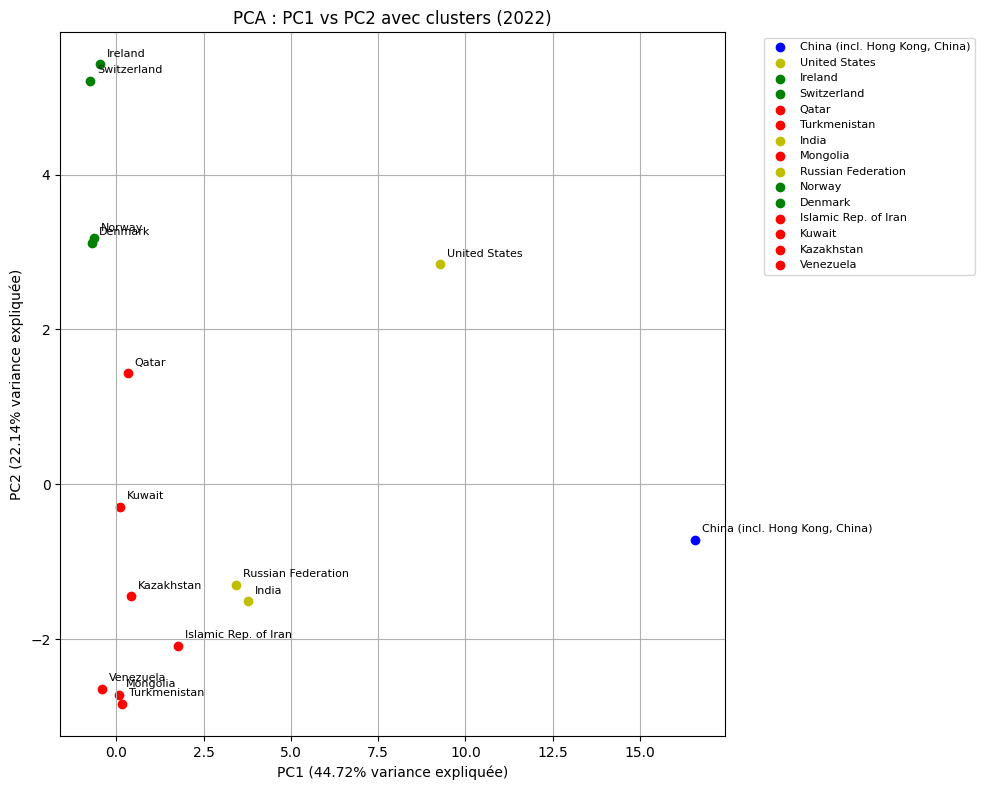

In [47]:
from sklearn.cluster import KMeans

# Extraire les données standardisées des pays significatifs
significant_indices = [df_consolidated.index.get_loc(country) for country in significant_countries]
X_scaled_significant = X_scaled[significant_indices]

# Appliquer K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled_significant)

# Créer un DataFrame avec les clusters
df_clusters = pd.DataFrame({"Cluster": clusters}, index=significant_countries)
print("\nClusters des pays significatifs :")
print(df_clusters)

# Ajouter les clusters aux graphiques (exemple pour PC1 vs PC2)
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']  # Couleurs pour chaque cluster
for i, country in enumerate(significant_countries):
    idx = df_consolidated.index.get_loc(country)
    cluster = clusters[i]
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], color=colors[cluster], label=country)
    plt.text(X_pca[idx, 0] + 0.2, X_pca[idx, 1] + 0.1, country, fontsize=8, ha='left')
plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance expliquée)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance expliquée)")
plt.title("PCA : PC1 vs PC2 avec clusters (2022)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()